In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D

In [86]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,8)

def kmeans(x,k,colores,dim):
    kmeans = KMeans(n_clusters=k).fit(x)
    centroids = kmeans.cluster_centers_
    print("\t~~~~centroides~~~~")
    print(centroids)
    labels = kmeans.predict(x)
    print("\t~~~~Etiquetas~~~~")
    print(labels)
    # Getting the cluster centers
    C = kmeans.cluster_centers_
    print(C.shape, "shape")
    asignar=[]
    for row in labels:
        asignar.append(colores[row])
    fig = plt.figure()
    if dim == 3:
        ax = Axes3D(fig)
        ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=asignar,s=60)
        ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000) #centroides 
    elif dim ==2:
        plt.scatter(x[:, 0], x[:, 1], c=asignar, s=70)
        plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
        plt.show()

In [3]:
def testClusters(limit,X):
    Nc = range(1, limit)
    kmeans = [KMeans(n_clusters=i) for i in Nc]
    score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
    plt.plot(Nc,score)
    plt.xlabel('Numero de clusters')
    plt.ylabel('Y')
    plt.title('X')
    plt.show()

In [4]:
#Procesando data de PRUEBA
dataframe = pd.read_csv(r"analisis.csv")

colores=['red','green','blue','cyan']
X = np.array(dataframe[["op","ex","ag"]])


In [5]:
#Processando 2
dataframe = pd.read_csv(r"caracteristicas.csv")
dataframe.describe()
X = np.array(dataframe[["price","accommodates","cleaning_fee"]])

In [75]:
# testClusters(20,X)

In [76]:
# kmeans(X,4,colores,2)

In [77]:
# kmeans(X,4,colores,3)

In [89]:
import pickle
infile = open('todo.pk','rb')
data_re = pickle.load(infile)
infile.close()
print(data_re)
data_re.shape
len(data_re[0])

[[  0.         100.061714     0.         ...   7.1828465   41.810192
   57.13201   ]
 [  0.          47.283028     0.48847967 ...  10.137584    47.335686
   84.189445  ]
 [  0.          41.846992     6.00585    ...  17.826756    50.111866
   76.36401   ]
 ...
 [  0.          98.609055     0.         ...   7.3201222  164.18541
  238.84186   ]
 [  0.          72.22733      0.         ...   3.6686597   15.559553
   33.26827   ]
 [  0.         100.46787      0.         ...   7.654843    39.051765
   50.125973  ]]


15

hi
15
	~~~~centroides~~~~
[[  0.7664145   76.14226   ]
 [  0.22541857 101.93357   ]
 [  9.5441475   49.996716  ]
 [  0.63369393 166.6702    ]]
	~~~~Etiquetas~~~~
[1 2 2 ... 1 0 1]
(4, 2) shape


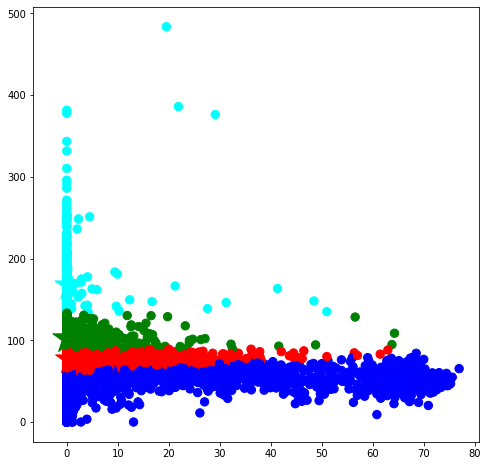

[[  0.       100.061714]
 [  0.        47.283028]
 [  0.        41.846992]
 ...
 [  0.        98.609055]
 [  0.        72.22733 ]
 [  0.       100.46787 ]]
	~~~~centroides~~~~
[[5.6127620e-01 6.1513901e-01]
 [0.0000000e+00 2.9300332e+03]
 [4.3773403e+01 9.7009301e-01]
 [8.8057947e-01 6.1853287e+01]]
	~~~~Etiquetas~~~~
[0 0 0 ... 0 0 0]
(4, 2) shape


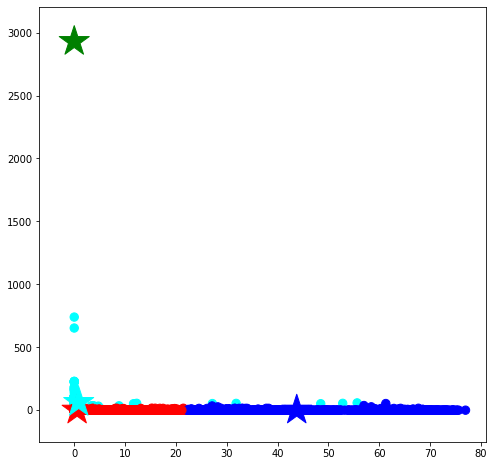

[[0.         0.        ]
 [0.         0.48847967]
 [0.         6.00585   ]
 ...
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]
	~~~~centroides~~~~
[[ 0.7040119  69.29099   ]
 [44.31811    72.57061   ]
 [ 0.296206   54.317825  ]
 [ 0.34809268 95.85101   ]]
	~~~~Etiquetas~~~~
[0 3 3 ... 0 0 0]
(4, 2) shape


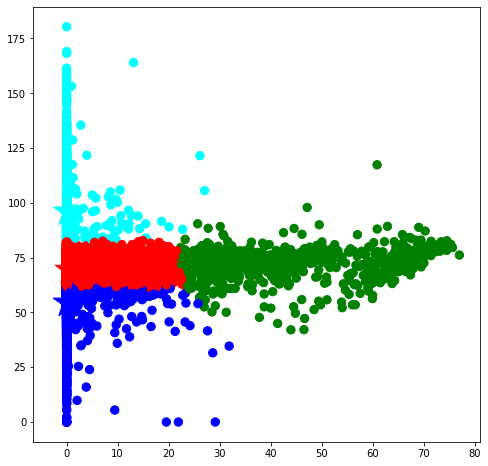

[[ 0.       66.04705 ]
 [ 0.       83.07236 ]
 [ 0.       93.30163 ]
 ...
 [ 0.       61.960175]
 [ 0.       75.17775 ]
 [ 0.       66.644226]]
	~~~~centroides~~~~
[[  0.69062495  88.48921   ]
 [  2.5329075   25.004196  ]
 [  0.48707497 440.15      ]
 [  0.67914855 207.92116   ]]
	~~~~Etiquetas~~~~
[1 3 2 ... 1 1 1]
(4, 2) shape


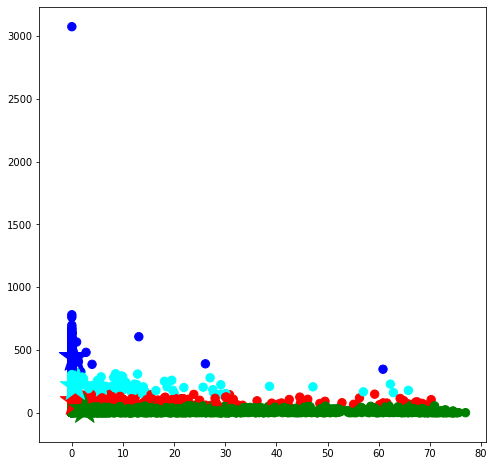

[[  0.         20.426016 ]
 [  0.        226.8541   ]
 [  0.        325.93683  ]
 ...
 [  0.          9.503956 ]
 [  0.          1.3964266]
 [  0.         11.070753 ]]
	~~~~centroides~~~~
[[ 0.11166799  0.        ]
 [32.73099     0.        ]
 [14.151111    0.        ]
 [62.93163     0.        ]]
	~~~~Etiquetas~~~~
[0 0 0 ... 0 0 0]
(4, 2) shape


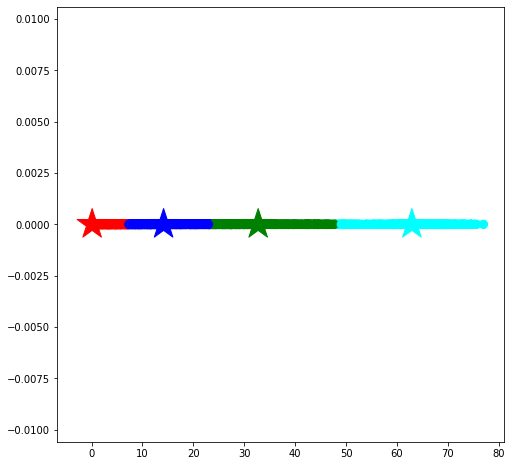

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
	~~~~centroides~~~~
[[2.1946950e+00 2.6362921e+01]
 [3.9258051e-01 1.8434785e+02]
 [1.5989149e+00 7.5767654e+01]
 [1.6588318e-01 5.7840735e+02]]
	~~~~Etiquetas~~~~
[0 2 2 ... 1 0 0]
(4, 2) shape


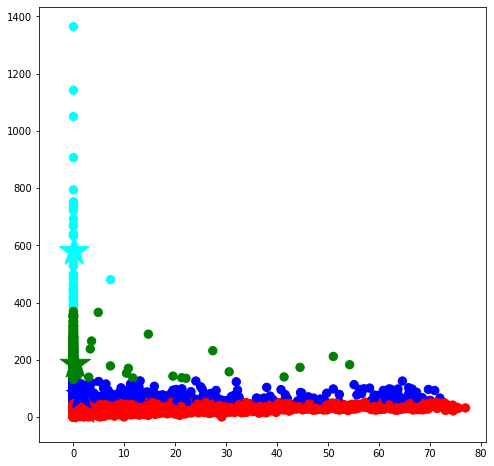

[[  0.         17.124779 ]
 [  0.         59.877357 ]
 [  0.         69.2452   ]
 ...
 [  0.        130.56897  ]
 [  0.          0.5456129]
 [  0.         13.326637 ]]
	~~~~centroides~~~~
[[  0.59629107 111.05841   ]
 [  0.4568975   71.53663   ]
 [  0.42432296 195.96457   ]
 [  7.1386204   52.273415  ]]
	~~~~Etiquetas~~~~
[1 0 2 ... 3 1 1]
(4, 2) shape


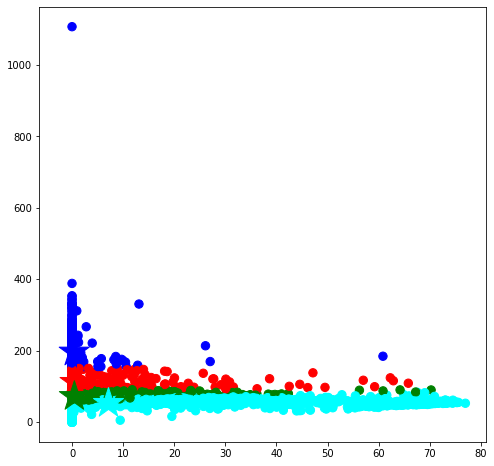

[[  0.        66.34226 ]
 [  0.       146.1139  ]
 [  0.       186.41199 ]
 ...
 [  0.        58.564617]
 [  0.        72.77723 ]
 [  0.        63.074905]]
	~~~~centroides~~~~
[[1.5554914e+00 2.8873562e+01]
 [4.6265121e+00 1.0806210e+02]
 [6.5507197e-01 3.7950241e+02]
 [0.0000000e+00 3.7618333e+03]]
	~~~~Etiquetas~~~~
[0 0 0 ... 1 0 0]
(4, 2) shape


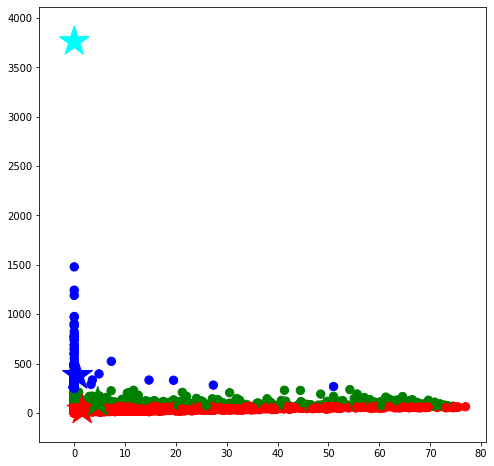

[[  0.         22.962936 ]
 [  0.         32.42937  ]
 [  0.         41.0827   ]
 ...
 [  0.        143.90247  ]
 [  0.          2.1496983]
 [  0.         15.959665 ]]
	~~~~centroides~~~~
[[1.1166799e-01 6.3143722e-03]
 [6.2931629e+01 3.3527613e-08]
 [1.4151111e+01 1.3266969e-01]
 [3.2730991e+01 2.0043033e-01]]
	~~~~Etiquetas~~~~
[0 0 0 ... 0 0 0]
(4, 2) shape


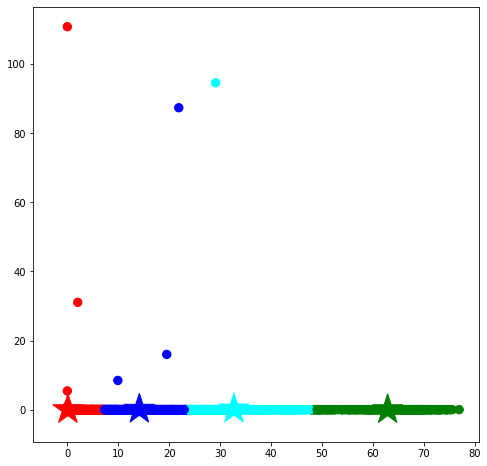

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
	~~~~centroides~~~~
[[-8.8214874e-06  1.2412280e+02]
 [ 0.0000000e+00  3.0709993e+03]
 [ 1.3859844e-01  5.0992416e+01]
 [ 9.9294834e+00  2.1158195e+01]]
	~~~~Etiquetas~~~~
[2 3 3 ... 2 2 2]
(4, 2) shape


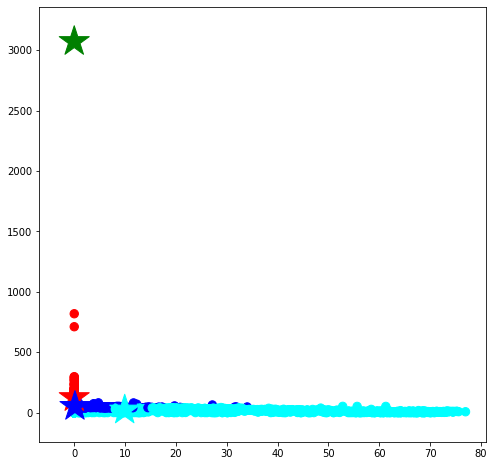

[[ 0.       51.928535]
 [ 0.       10.230653]
 [ 0.        0.      ]
 ...
 [ 0.       49.22761 ]
 [ 0.       58.492126]
 [ 0.       53.92156 ]]
	~~~~centroides~~~~
[[  0.28940356  49.776505  ]
 [  0.6425859   17.869661  ]
 [  0.16141236 145.90532   ]
 [ 43.80703     14.266227  ]]
	~~~~Etiquetas~~~~
[1 1 0 ... 1 1 1]
(4, 2) shape


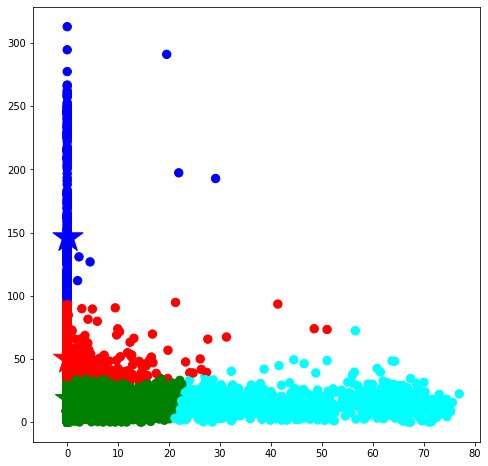

[[ 0.        23.882626 ]
 [ 0.        28.328028 ]
 [ 0.        40.318398 ]
 ...
 [ 0.        27.04717  ]
 [ 0.        10.2813425]
 [ 0.        25.568916 ]]
	~~~~centroides~~~~
[[3.95076275e-02 1.02974495e+02]
 [5.69150329e-01 1.00906124e+01]
 [0.00000000e+00 3.06696899e+03]
 [4.36931114e+01 2.11632233e+01]]
	~~~~Etiquetas~~~~
[1 1 1 ... 1 1 1]
(4, 2) shape


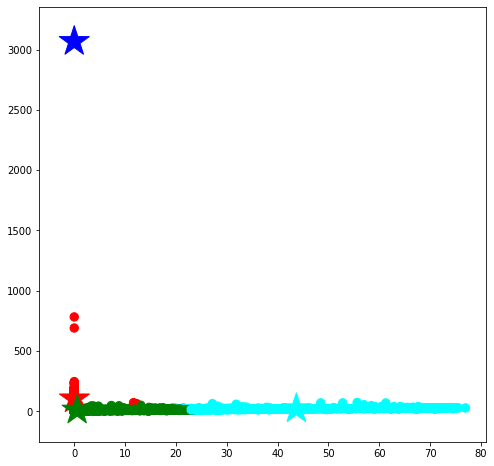

[[ 0.         7.1828465]
 [ 0.        10.137584 ]
 [ 0.        17.826756 ]
 ...
 [ 0.         7.3201222]
 [ 0.         3.6686597]
 [ 0.         7.654843 ]]
	~~~~centroides~~~~
[[1.1549659e+00 8.8933945e+01]
 [2.3051794e+00 3.6869305e+01]
 [5.9987104e-01 2.1005319e+02]
 [5.3672159e-01 6.0198871e+02]]
	~~~~Etiquetas~~~~
[1 1 1 ... 2 1 1]
(4, 2) shape


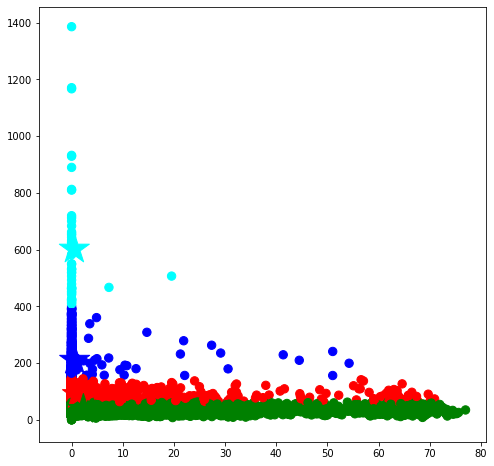

[[  0.        41.810192]
 [  0.        47.335686]
 [  0.        50.111866]
 ...
 [  0.       164.18541 ]
 [  0.        15.559553]
 [  0.        39.051765]]
	~~~~centroides~~~~
[[5.6617057e-01 1.3227374e+02]
 [4.1085684e-01 3.1369894e+02]
 [2.4382918e+00 6.1531776e+01]
 [2.0274532e-01 9.9878101e+02]]
	~~~~Etiquetas~~~~
[2 2 2 ... 1 2 2]
(4, 2) shape


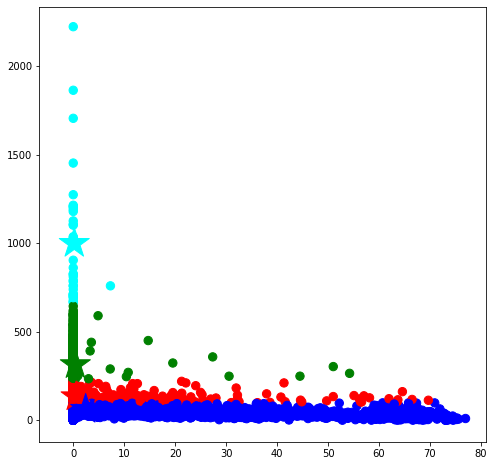

[[  0.        57.13201 ]
 [  0.        84.189445]
 [  0.        76.36401 ]
 ...
 [  0.       238.84186 ]
 [  0.        33.26827 ]
 [  0.        50.125973]]
-----
	~~~~centroides~~~~
[[1.3513654e+02 6.8545194e+00]
 [6.1370979e+01 9.1070569e-01]
 [8.9963654e+01 8.4678859e-01]
 [2.9592905e+02 2.9300332e+03]]
	~~~~Etiquetas~~~~
[2 1 1 ... 2 1 2]
(4, 2) shape


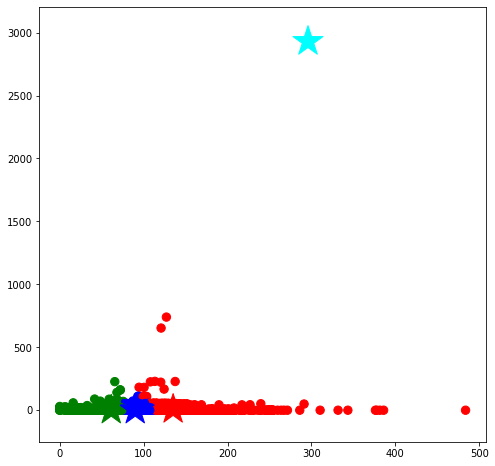

[[100.061714     0.        ]
 [ 47.283028     0.48847967]
 [ 41.846992     6.00585   ]
 ...
 [ 98.609055     0.        ]
 [ 72.22733      0.        ]
 [100.46787      0.        ]]
	~~~~centroides~~~~
[[ 74.02669   68.2012  ]
 [100.32489   61.89568 ]
 [ 46.719627  83.35712 ]
 [165.01921   53.228184]]
	~~~~Etiquetas~~~~
[1 2 2 ... 1 0 1]
(4, 2) shape


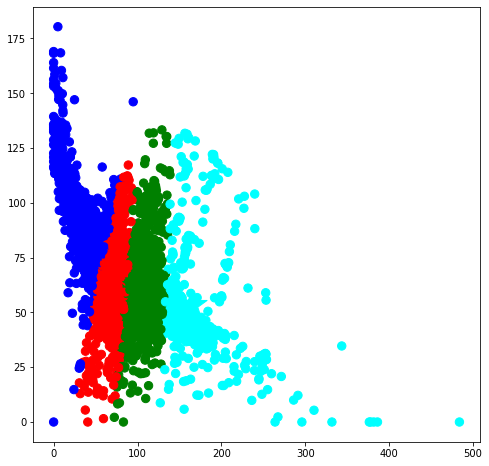

[[100.061714  66.04705 ]
 [ 47.283028  83.07236 ]
 [ 41.846992  93.30163 ]
 ...
 [ 98.609055  61.960175]
 [ 72.22733   75.17775 ]
 [100.46787   66.644226]]
	~~~~centroides~~~~
[[ 83.38052   23.940037]
 [ 88.831116  82.514534]
 [ 59.584175 190.27698 ]
 [ 23.49001  399.18103 ]]
	~~~~Etiquetas~~~~
[0 2 3 ... 0 0 0]
(4, 2) shape


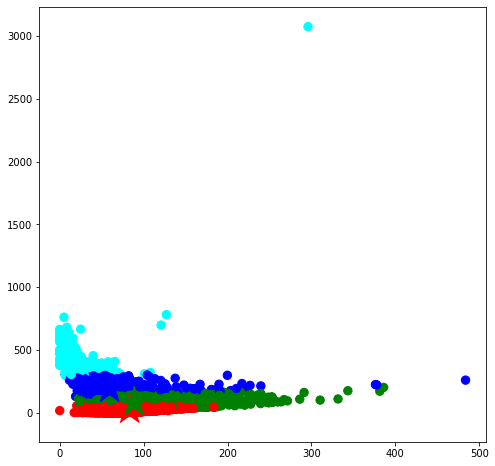

[[100.061714   20.426016 ]
 [ 47.283028  226.8541   ]
 [ 41.846992  325.93683  ]
 ...
 [ 98.609055    9.503956 ]
 [ 72.22733     1.3964266]
 [100.46787    11.070753 ]]
	~~~~centroides~~~~
[[ 78.92253    0.      ]
 [169.30737    0.      ]
 [ 53.796936   0.      ]
 [103.829346   0.      ]]
	~~~~Etiquetas~~~~
[3 2 2 ... 3 0 3]
(4, 2) shape


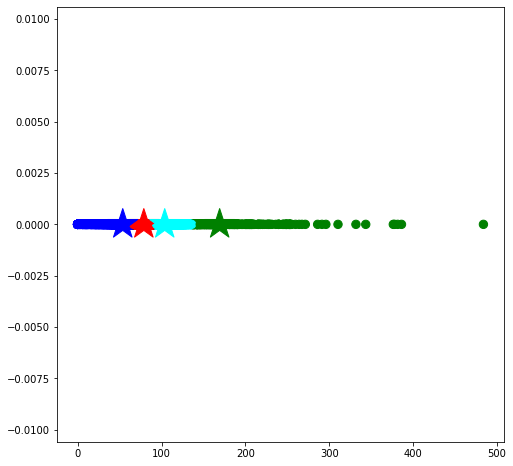

[[100.061714   0.      ]
 [ 47.283028   0.      ]
 [ 41.846992   0.      ]
 ...
 [ 98.609055   0.      ]
 [ 72.22733    0.      ]
 [100.46787    0.      ]]
	~~~~centroides~~~~
[[ 77.31269   26.683815]
 [122.94542  180.93306 ]
 [ 92.320465  74.54033 ]
 [116.73641  578.40735 ]]
	~~~~Etiquetas~~~~
[0 0 2 ... 1 0 0]
(4, 2) shape


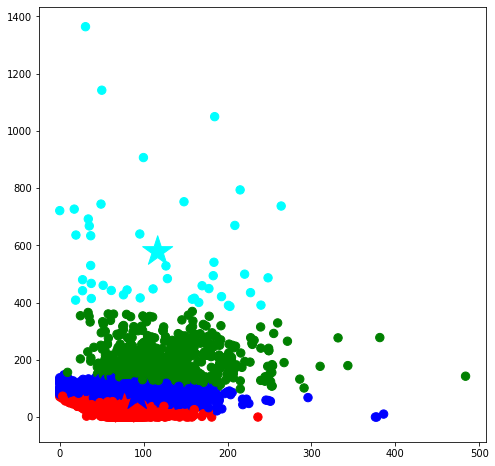

[[100.061714   17.124779 ]
 [ 47.283028   59.877357 ]
 [ 41.846992   69.2452   ]
 ...
 [ 98.609055  130.56897  ]
 [ 72.22733     0.5456129]
 [100.46787    13.326637 ]]
	~~~~centroides~~~~
[[ 77.6168    68.82016 ]
 [ 30.004917 190.06604 ]
 [114.186035  58.291172]
 [ 62.750225 107.28162 ]]
	~~~~Etiquetas~~~~
[2 3 1 ... 2 0 2]
(4, 2) shape


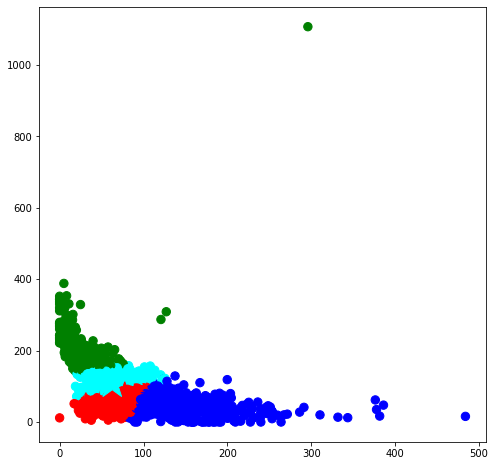

[[100.061714  66.34226 ]
 [ 47.283028 146.1139  ]
 [ 41.846992 186.41199 ]
 ...
 [ 98.609055  58.564617]
 [ 72.22733   72.77723 ]
 [100.46787   63.074905]]
	~~~~centroides~~~~
[[ 107.08252   104.82895 ]
 [ 134.62161   374.04996 ]
 [  77.25113    28.713291]
 [ 295.92905  3761.8333  ]]
	~~~~Etiquetas~~~~
[2 2 2 ... 0 2 2]
(4, 2) shape


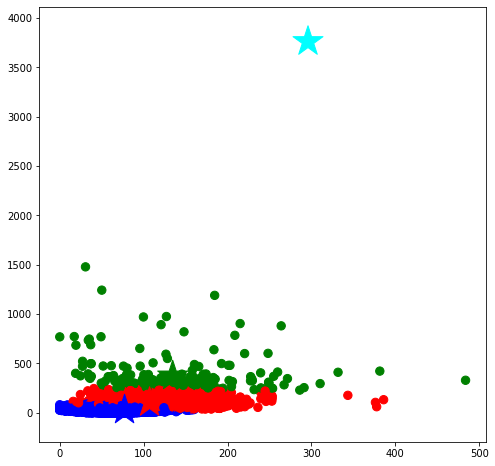

[[100.061714   22.962936 ]
 [ 47.283028   32.42937  ]
 [ 41.846992   41.0827   ]
 ...
 [ 98.609055  143.90247  ]
 [ 72.22733     2.1496983]
 [100.46787    15.959665 ]]
	~~~~centroides~~~~
[[ 7.8926666e+01  8.7637454e-07]
 [ 1.6930737e+02  5.9826642e-01]
 [ 5.3799179e+01 -3.6880374e-07]
 [ 1.0383478e+02  7.3574483e-08]]
	~~~~Etiquetas~~~~
[3 2 2 ... 3 0 3]
(4, 2) shape


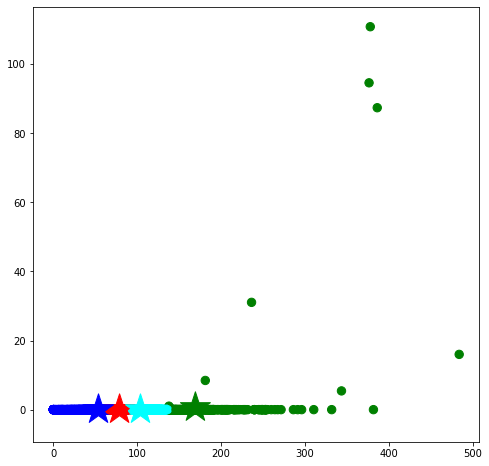

[[100.061714   0.      ]
 [ 47.283028   0.      ]
 [ 41.846992   0.      ]
 ...
 [ 98.609055   0.      ]
 [ 72.22733    0.      ]
 [100.46787    0.      ]]
	~~~~centroides~~~~
[[  54.492374   23.904375]
 [ 121.69797    56.866684]
 [ 295.92905  3070.9993  ]
 [  81.05904    50.927494]]
	~~~~Etiquetas~~~~
[3 0 0 ... 3 3 3]
(4, 2) shape


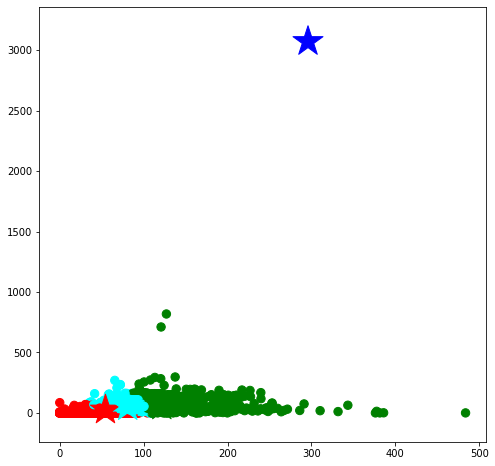

[[100.061714  51.928535]
 [ 47.283028  10.230653]
 [ 41.846992   0.      ]
 ...
 [ 98.609055  49.22761 ]
 [ 72.22733   58.492126]
 [100.46787   53.92156 ]]
	~~~~centroides~~~~
[[ 88.14655   23.026426]
 [115.01128   56.105087]
 [ 61.196777  14.822946]
 [168.12305  153.80571 ]]
	~~~~Etiquetas~~~~
[0 2 2 ... 0 2 0]
(4, 2) shape


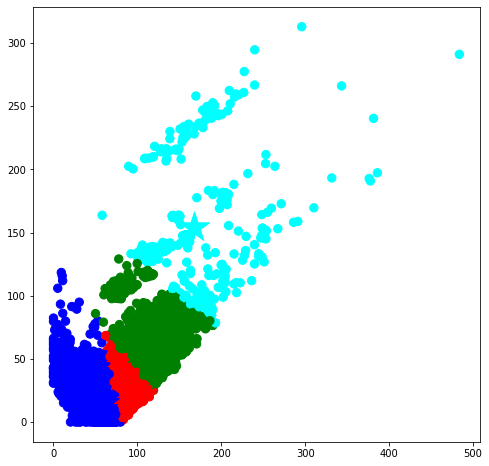

[[100.061714   23.882626 ]
 [ 47.283028   28.328028 ]
 [ 41.846992   40.318398 ]
 ...
 [ 98.609055   27.04717  ]
 [ 72.22733    10.2813425]
 [100.46787    25.568916 ]]
	~~~~centroides~~~~
[[  99.47587    11.067445]
 [  66.36919    10.242339]
 [ 295.92905  3066.969   ]
 [ 134.23972   101.06384 ]]
	~~~~Etiquetas~~~~
[0 1 1 ... 0 1 0]
(4, 2) shape


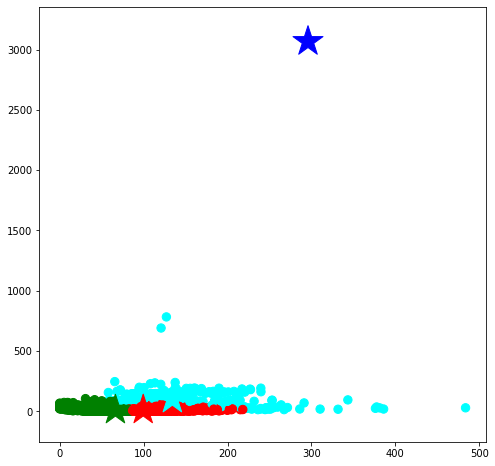

[[100.061714    7.1828465]
 [ 47.283028   10.137584 ]
 [ 41.846992   17.826756 ]
 ...
 [ 98.609055    7.3201222]
 [ 72.22733     3.6686597]
 [100.46787     7.654843 ]]
	~~~~centroides~~~~
[[ 69.88726   33.002426]
 [152.79175  433.1603  ]
 [ 96.107254  67.908844]
 [119.59198  161.11168 ]]
	~~~~Etiquetas~~~~
[2 0 0 ... 3 0 2]
(4, 2) shape


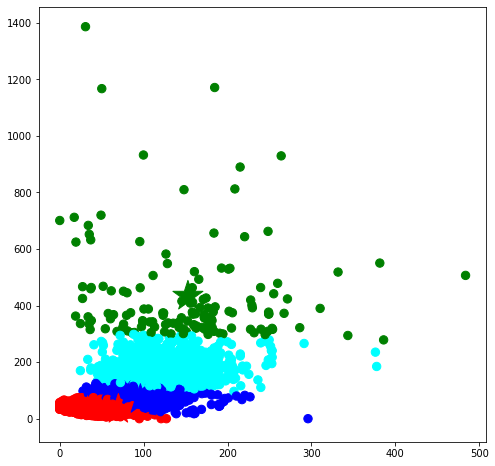

[[100.061714  41.810192]
 [ 47.283028  47.335686]
 [ 41.846992  50.111866]
 ...
 [ 98.609055 164.18541 ]
 [ 72.22733   15.559553]
 [100.46787   39.051765]]
	~~~~centroides~~~~
[[ 76.65785   61.018333]
 [117.81078  309.6004  ]
 [ 97.057755 128.98488 ]
 [109.00249  998.781   ]]
	~~~~Etiquetas~~~~
[0 0 0 ... 1 0 0]
(4, 2) shape


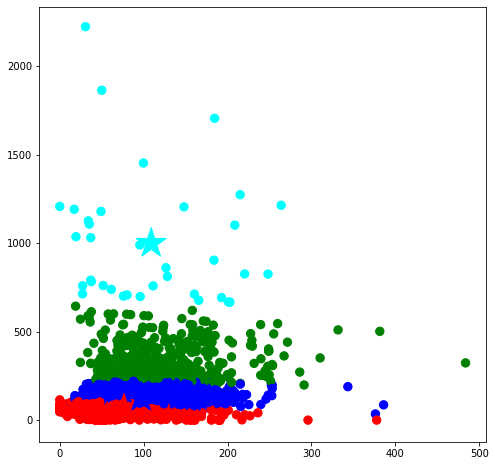

[[100.061714  57.13201 ]
 [ 47.283028  84.189445]
 [ 41.846992  76.36401 ]
 ...
 [ 98.609055 238.84186 ]
 [ 72.22733   33.26827 ]
 [100.46787   50.125973]]
-----
	~~~~centroides~~~~
[[6.3982117e-01 6.0206135e+01]
 [6.2235401e+01 7.0560982e+01]
 [2.9300332e+03 0.0000000e+00]
 [6.1862057e-01 7.5530289e+01]]
	~~~~Etiquetas~~~~
[0 3 3 ... 0 3 0]
(4, 2) shape


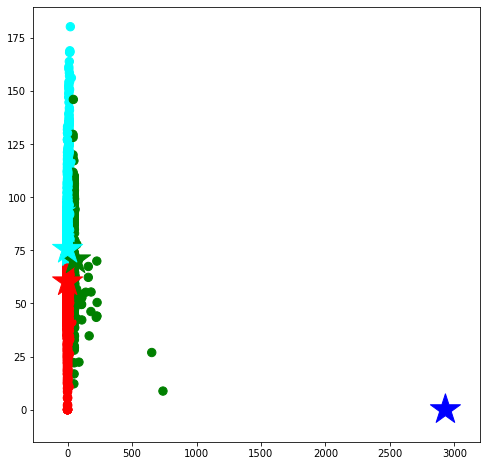

[[ 0.         66.04705   ]
 [ 0.48847967 83.07236   ]
 [ 6.00585    93.30163   ]
 ...
 [ 0.         61.960175  ]
 [ 0.         75.17775   ]
 [ 0.         66.644226  ]]
	~~~~centroides~~~~
[[3.6463819e+00 1.1243773e+02]
 [5.5224472e-01 2.8345272e+01]
 [2.9300332e+03 3.0747402e+03]
 [6.8846693e+00 2.9740042e+02]]
	~~~~Etiquetas~~~~
[1 3 3 ... 1 1 1]
(4, 2) shape


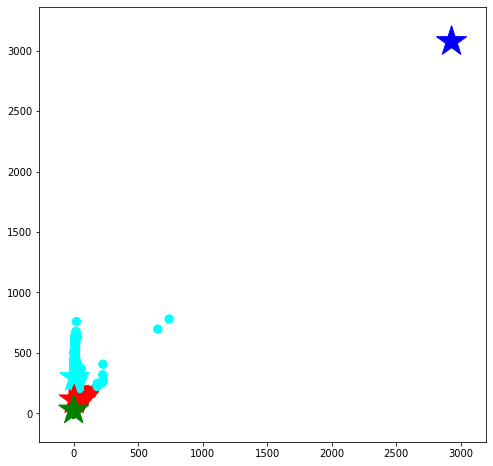

[[  0.          20.426016  ]
 [  0.48847967 226.8541    ]
 [  6.00585    325.93683   ]
 ...
 [  0.           9.503956  ]
 [  0.           1.3964266 ]
 [  0.          11.070753  ]]
	~~~~centroides~~~~
[[6.1984026e-01 0.0000000e+00]
 [2.9300332e+03 0.0000000e+00]
 [6.9633594e+02 0.0000000e+00]
 [5.7199657e+01 0.0000000e+00]]
	~~~~Etiquetas~~~~
[0 0 0 ... 0 0 0]
(4, 2) shape


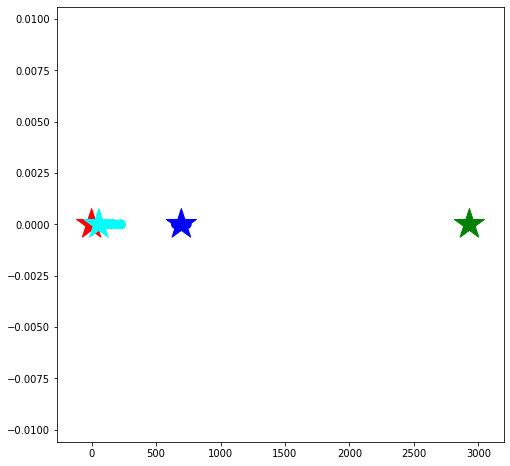

[[0.         0.        ]
 [0.48847967 0.        ]
 [6.00585    0.        ]
 ...
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]
	~~~~centroides~~~~
[[9.7643310e-01 2.9424355e+01]
 [6.3062626e-01 3.0601514e+02]
 [3.4124594e+00 1.0094153e+02]
 [2.9300332e+03 6.7974541e+01]]
	~~~~Etiquetas~~~~
[0 0 2 ... 2 0 0]
(4, 2) shape


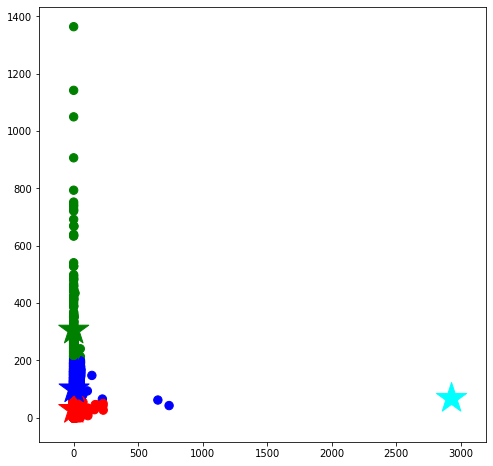

[[  0.          17.124779  ]
 [  0.48847967  59.877357  ]
 [  6.00585     69.2452    ]
 ...
 [  0.         130.56897   ]
 [  0.           0.5456129 ]
 [  0.          13.326637  ]]
	~~~~centroides~~~~
[[1.1322380e+00 6.4565453e+01]
 [1.2995102e+00 9.9789864e+01]
 [6.6890993e+00 1.8056595e+02]
 [2.9300332e+03 1.1069785e+03]]
	~~~~Etiquetas~~~~
[0 2 2 ... 0 0 0]
(4, 2) shape


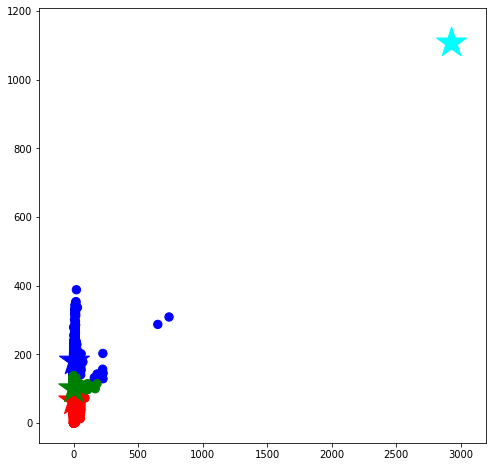

[[  0.          66.34226   ]
 [  0.48847967 146.1139    ]
 [  6.00585    186.41199   ]
 ...
 [  0.          58.564617  ]
 [  0.          72.77723   ]
 [  0.          63.074905  ]]
	~~~~centroides~~~~
[[6.2419301e-01 2.8947388e+01]
 [4.7525191e+00 1.0846386e+02]
 [1.6710787e+01 3.7882715e+02]
 [2.9300332e+03 3.7618333e+03]]
	~~~~Etiquetas~~~~
[0 0 0 ... 1 0 0]
(4, 2) shape


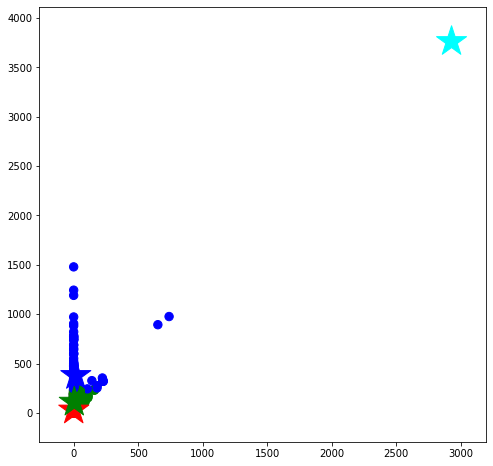

[[  0.          22.962936  ]
 [  0.48847967  32.42937   ]
 [  6.00585     41.0827    ]
 ...
 [  0.         143.90247   ]
 [  0.           2.1496983 ]
 [  0.          15.959665  ]]
	~~~~centroides~~~~
[[6.1984026e-01 1.4287941e-02]
 [2.9300332e+03 0.0000000e+00]
 [6.9633594e+02 0.0000000e+00]
 [5.7199657e+01 3.2596290e-08]]
	~~~~Etiquetas~~~~
[0 0 0 ... 0 0 0]
(4, 2) shape


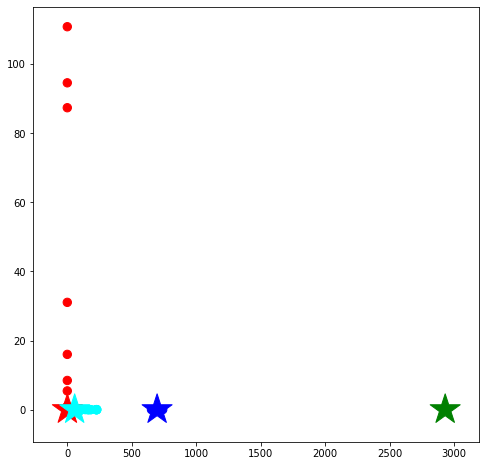

[[0.         0.        ]
 [0.48847967 0.        ]
 [6.00585    0.        ]
 ...
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]
	~~~~centroides~~~~
[[6.5863043e-01 5.1744484e+01]
 [2.9300332e+03 3.0709993e+03]
 [6.6926295e-01 2.3285671e+01]
 [3.5388229e+01 1.2679561e+02]]
	~~~~Etiquetas~~~~
[0 2 2 ... 0 0 0]
(4, 2) shape


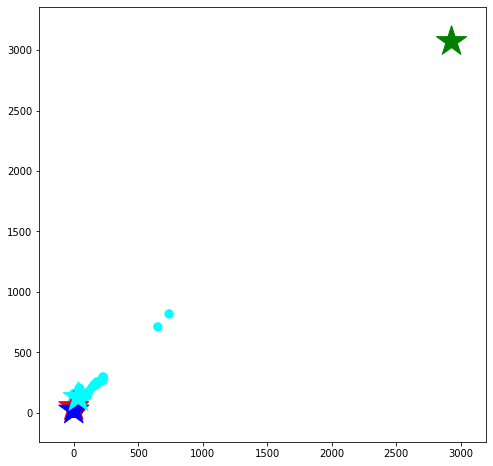

[[ 0.         51.928535  ]
 [ 0.48847967 10.230653  ]
 [ 6.00585     0.        ]
 ...
 [ 0.         49.22761   ]
 [ 0.         58.492126  ]
 [ 0.         53.92156   ]]
	~~~~centroides~~~~
[[7.3053330e-01 1.7698551e+01]
 [2.9300332e+03 3.1291071e+02]
 [2.7178798e+00 4.9818943e+01]
 [1.4363985e+01 1.4603329e+02]]
	~~~~Etiquetas~~~~
[0 0 2 ... 0 0 0]
(4, 2) shape


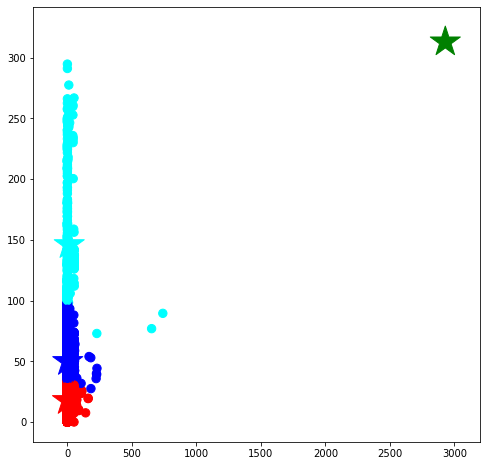

[[ 0.         23.882626  ]
 [ 0.48847967 28.328028  ]
 [ 6.00585    40.318398  ]
 ...
 [ 0.         27.04717   ]
 [ 0.         10.2813425 ]
 [ 0.         25.568916  ]]
	~~~~centroides~~~~
[[6.3090122e-01 1.0471390e+01]
 [2.9300332e+03 3.0669690e+03]
 [6.9633594e+02 7.3667535e+02]
 [2.7387268e+01 1.0104442e+02]]
	~~~~Etiquetas~~~~
[0 0 0 ... 0 0 0]
(4, 2) shape


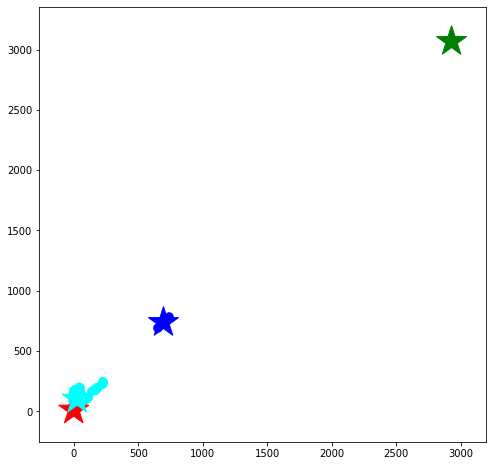

[[ 0.          7.1828465 ]
 [ 0.48847967 10.137584  ]
 [ 6.00585    17.826756  ]
 ...
 [ 0.          7.3201222 ]
 [ 0.          3.6686597 ]
 [ 0.          7.654843  ]]
	~~~~centroides~~~~
[[1.4099009e+00 4.0730640e+01]
 [3.0395913e-01 3.6591989e+02]
 [1.0688720e+00 1.1974376e+02]
 [2.9300332e+03 0.0000000e+00]]
	~~~~Etiquetas~~~~
[0 0 0 ... 2 0 0]
(4, 2) shape


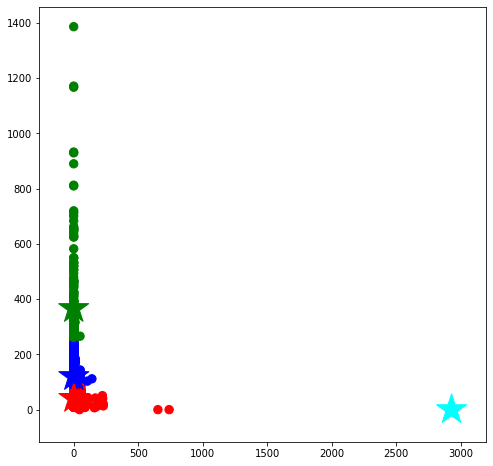

[[  0.          41.810192  ]
 [  0.48847967  47.335686  ]
 [  6.00585     50.111866  ]
 ...
 [  0.         164.18541   ]
 [  0.          15.559553  ]
 [  0.          39.051765  ]]
	~~~~centroides~~~~
[[1.6293899e+00 6.1487740e+01]
 [9.5559716e-02 3.1356857e+02]
 [1.0555598e+00 1.3209088e+02]
 [7.3863387e-02 9.9878101e+02]]
	~~~~Etiquetas~~~~
[0 0 0 ... 1 0 0]
(4, 2) shape


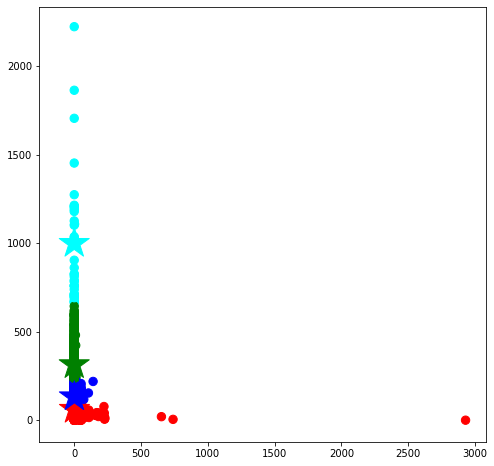

[[  0.          57.13201   ]
 [  0.48847967  84.189445  ]
 [  6.00585     76.36401   ]
 ...
 [  0.         238.84186   ]
 [  0.          33.26827   ]
 [  0.          50.125973  ]]
-----
	~~~~centroides~~~~
[[ 64.77274   24.832119]
 [ 82.98661  205.10579 ]
 [ 69.590096  87.385   ]
 [114.53621  435.2539  ]]
	~~~~Etiquetas~~~~
[0 1 3 ... 0 0 0]
(4, 2) shape


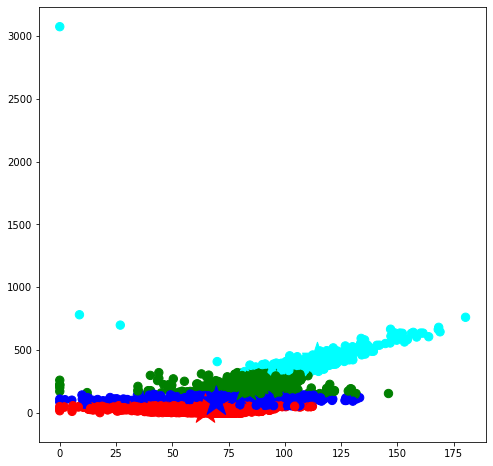

[[ 66.04705    20.426016 ]
 [ 83.07236   226.8541   ]
 [ 93.30163   325.93683  ]
 ...
 [ 61.960175    9.503956 ]
 [ 75.17775     1.3964266]
 [ 66.644226   11.070753 ]]
	~~~~centroides~~~~
[[ 63.281235   0.      ]
 [ 73.45475    0.      ]
 [100.32211    0.      ]
 [ 47.149284   0.      ]]
	~~~~Etiquetas~~~~
[0 1 2 ... 0 1 0]
(4, 2) shape


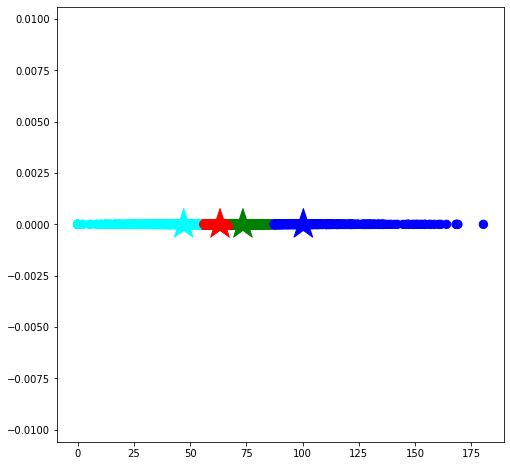

[[66.04705   0.      ]
 [83.07236   0.      ]
 [93.30163   0.      ]
 ...
 [61.960175  0.      ]
 [75.17775   0.      ]
 [66.644226  0.      ]]
	~~~~centroides~~~~
[[ 68.86001   75.47508 ]
 [ 70.35882  184.17911 ]
 [ 66.9122    26.292112]
 [ 49.061577 578.40735 ]]
	~~~~Etiquetas~~~~
[2 0 0 ... 1 2 2]
(4, 2) shape


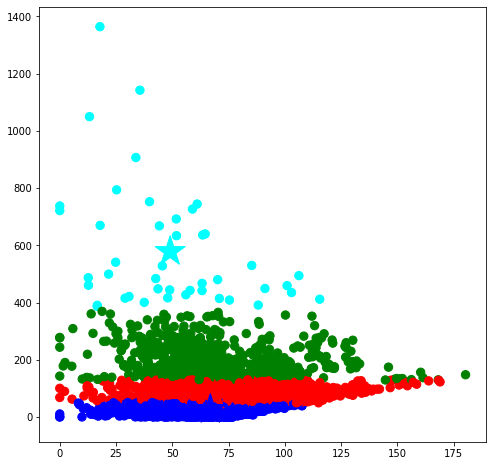

[[ 66.04705    17.124779 ]
 [ 83.07236    59.877357 ]
 [ 93.30163    69.2452   ]
 ...
 [ 61.960175  130.56897  ]
 [ 75.17775     0.5456129]
 [ 66.644226   13.326637 ]]
	~~~~centroides~~~~
[[104.13402  201.72519 ]
 [ 68.77874   74.09917 ]
 [ 77.728966 115.6747  ]
 [ 59.908443  56.20549 ]]
	~~~~Etiquetas~~~~
[1 2 0 ... 3 1 3]
(4, 2) shape


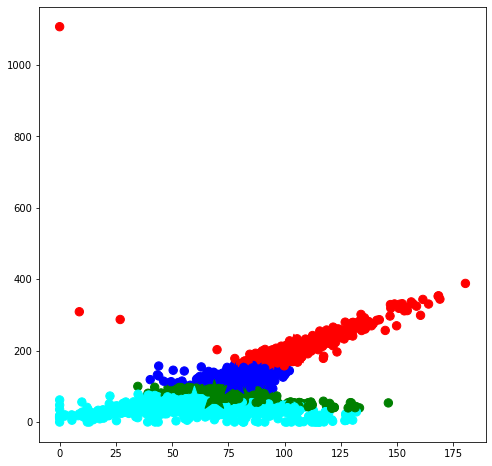

[[ 66.04705   66.34226 ]
 [ 83.07236  146.1139  ]
 [ 93.30163  186.41199 ]
 ...
 [ 61.960175  58.564617]
 [ 75.17775   72.77723 ]
 [ 66.644226  63.074905]]
	~~~~centroides~~~~
[[  62.60324   107.4404  ]
 [  46.117462  378.15414 ]
 [   0.       3761.8333  ]
 [  68.47829    28.779621]]
	~~~~Etiquetas~~~~
[3 3 3 ... 0 3 3]
(4, 2) shape


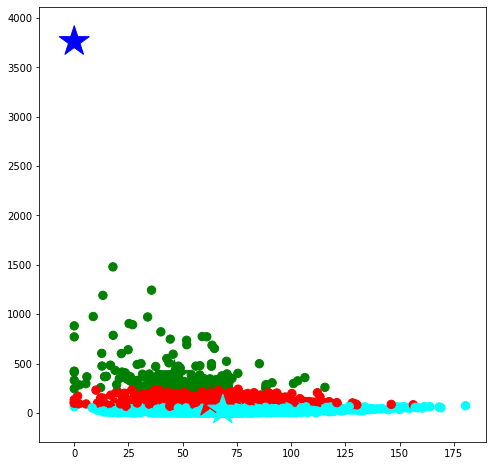

[[ 66.04705    22.962936 ]
 [ 83.07236    32.42937  ]
 [ 93.30163    41.0827   ]
 ...
 [ 61.960175  143.90247  ]
 [ 75.17775     2.1496983]
 [ 66.644226   15.959665 ]]
	~~~~centroides~~~~
[[7.34253616e+01 6.57513738e-07]
 [6.32313499e+01 8.35396349e-07]
 [1.00310196e+02 4.19095159e-08]
 [4.70246277e+01 1.49313405e-01]]
	~~~~Etiquetas~~~~
[1 0 2 ... 1 0 1]
(4, 2) shape


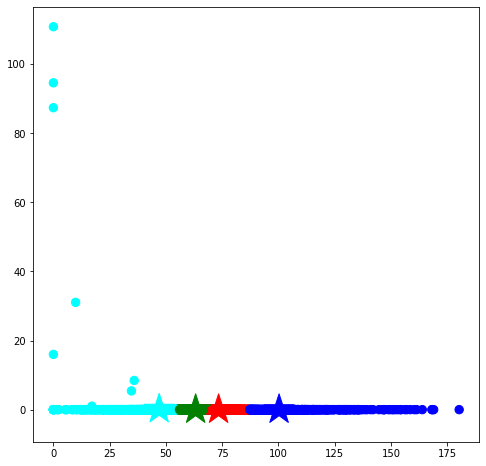

[[66.04705   0.      ]
 [83.07236   0.      ]
 [93.30163   0.      ]
 ...
 [61.960175  0.      ]
 [75.17775   0.      ]
 [66.644226  0.      ]]
	~~~~centroides~~~~
[[  64.66662    51.031986]
 [   0.       3070.9993  ]
 [  76.34164    21.965162]
 [  85.27483   123.04109 ]]
	~~~~Etiquetas~~~~
[0 2 2 ... 0 0 0]
(4, 2) shape


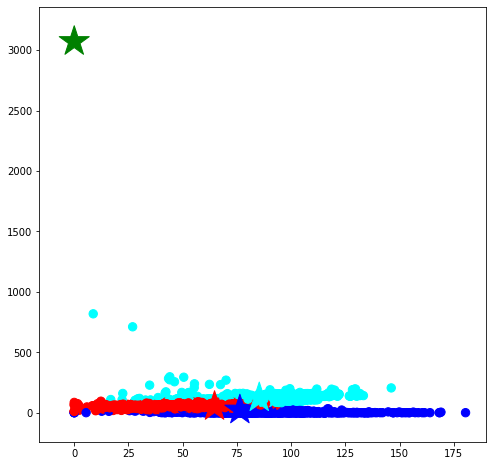

[[66.04705  51.928535]
 [83.07236  10.230653]
 [93.30163   0.      ]
 ...
 [61.960175 49.22761 ]
 [75.17775  58.492126]
 [66.644226 53.92156 ]]
	~~~~centroides~~~~
[[ 67.158066  67.67661 ]
 [ 70.734955  14.384398]
 [ 61.14742   30.5049  ]
 [ 87.40591  156.71413 ]]
	~~~~Etiquetas~~~~
[2 1 2 ... 2 1 2]
(4, 2) shape


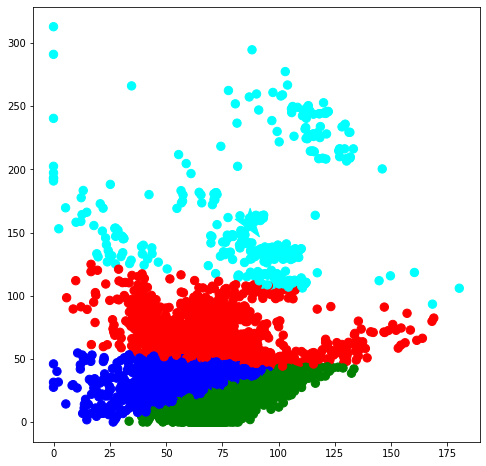

[[66.04705   23.882626 ]
 [83.07236   28.328028 ]
 [93.30163   40.318398 ]
 ...
 [61.960175  27.04717  ]
 [75.17775   10.2813425]
 [66.644226  25.568916 ]]
	~~~~centroides~~~~
[[  64.89876     8.659046]
 [   0.       3066.969   ]
 [  87.148605  112.08984 ]
 [  81.047775   24.267351]]
	~~~~Etiquetas~~~~
[0 3 3 ... 0 0 0]
(4, 2) shape


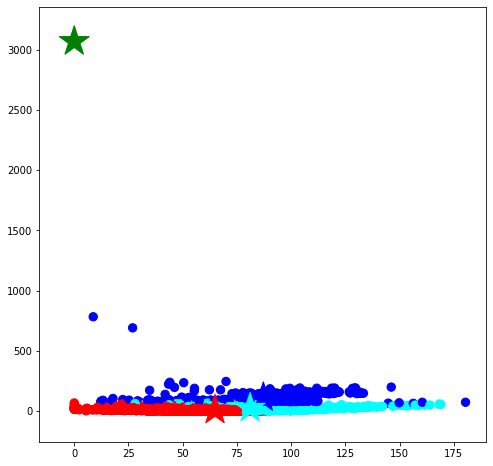

[[66.04705    7.1828465]
 [83.07236   10.137584 ]
 [93.30163   17.826756 ]
 ...
 [61.960175   7.3201222]
 [75.17775    3.6686597]
 [66.644226   7.654843 ]]
	~~~~centroides~~~~
[[ 69.54011   36.761936]
 [ 54.42283  209.70233 ]
 [ 62.529305  88.43549 ]
 [ 33.719017 601.9887  ]]
	~~~~Etiquetas~~~~
[0 0 0 ... 1 0 0]
(4, 2) shape


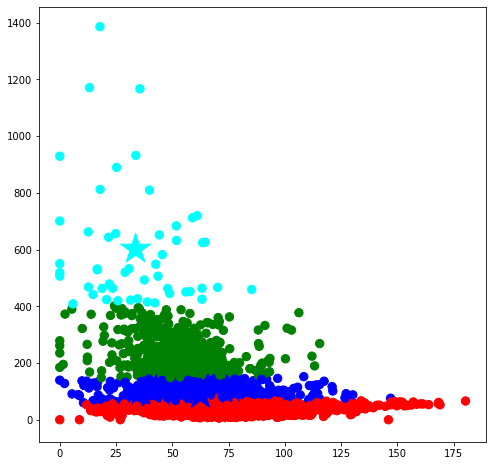

[[ 66.04705   41.810192]
 [ 83.07236   47.335686]
 [ 93.30163   50.111866]
 ...
 [ 61.960175 164.18541 ]
 [ 75.17775   15.559553]
 [ 66.644226  39.051765]]
	~~~~centroides~~~~
[[ 63.800156 131.68787 ]
 [ 39.0851   998.781   ]
 [ 56.60533  312.91287 ]
 [ 68.850716  61.40782 ]]
	~~~~Etiquetas~~~~
[3 3 3 ... 2 3 3]
(4, 2) shape


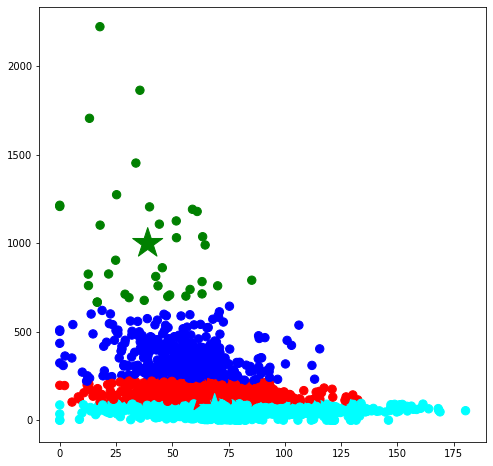

[[ 66.04705   57.13201 ]
 [ 83.07236   84.189445]
 [ 93.30163   76.36401 ]
 ...
 [ 61.960175 238.84186 ]
 [ 75.17775   33.26827 ]
 [ 66.644226  50.125973]]
-----
	~~~~centroides~~~~
[[ 25.041561   0.      ]
 [208.04263    0.      ]
 [ 88.64153    0.      ]
 [440.15       0.      ]]
	~~~~Etiquetas~~~~
[0 1 3 ... 0 0 0]
(4, 2) shape


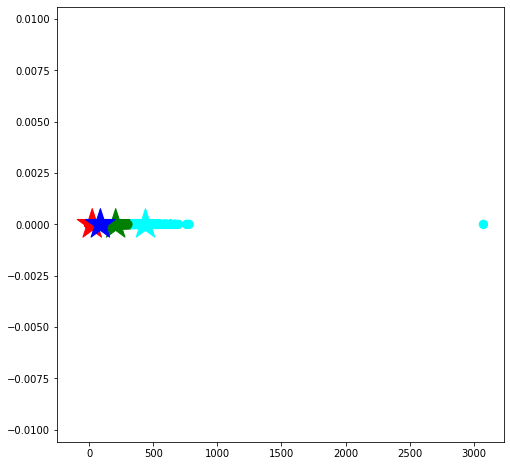

[[ 20.426016    0.       ]
 [226.8541      0.       ]
 [325.93683     0.       ]
 ...
 [  9.503956    0.       ]
 [  1.3964266   0.       ]
 [ 11.070753    0.       ]]
	~~~~centroides~~~~
[[112.17589   47.242737]
 [ 66.1926   179.86775 ]
 [303.70953   67.5531  ]
 [ 27.576511  31.905602]]
	~~~~Etiquetas~~~~
[3 2 2 ... 1 3 3]
(4, 2) shape


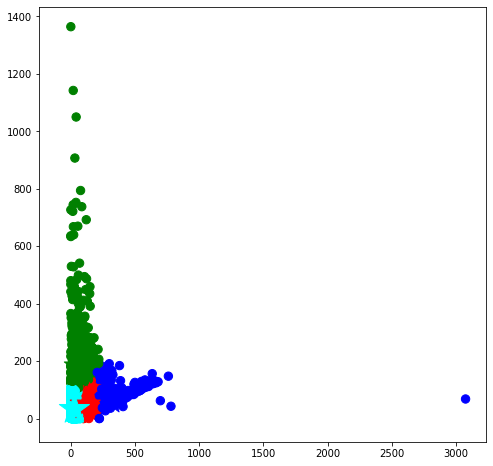

[[ 20.426016   17.124779 ]
 [226.8541     59.877357 ]
 [325.93683    69.2452   ]
 ...
 [  9.503956  130.56897  ]
 [  1.3964266   0.5456129]
 [ 11.070753   13.326637 ]]
	~~~~centroides~~~~
[[ 89.05214   85.00895 ]
 [ 25.346428  64.81768 ]
 [432.86887  234.60413 ]
 [205.53838  137.58328 ]]
	~~~~Etiquetas~~~~
[1 3 2 ... 1 1 1]
(4, 2) shape


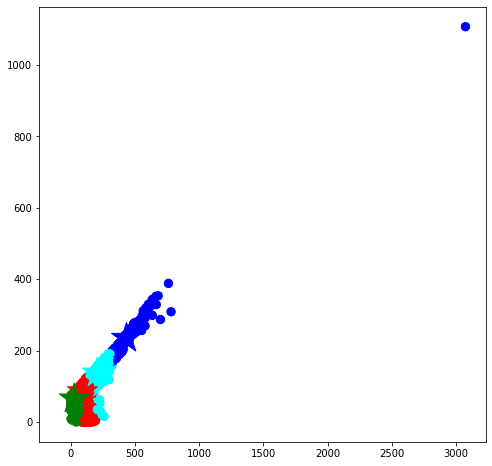

[[ 20.426016   66.34226  ]
 [226.8541    146.1139   ]
 [325.93683   186.41199  ]
 ...
 [  9.503956   58.564617 ]
 [  1.3964266  72.77723  ]
 [ 11.070753   63.074905 ]]
	~~~~centroides~~~~
[[  35.994072   33.355614]
 [ 213.90884    36.888847]
 [  64.29156   165.82571 ]
 [3074.7402   3761.8333  ]]
	~~~~Etiquetas~~~~
[0 1 1 ... 2 0 0]
(4, 2) shape


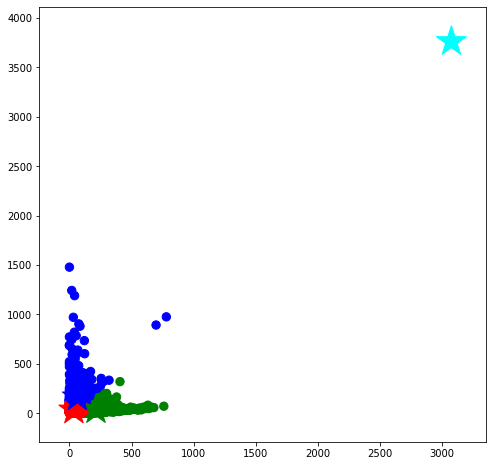

[[ 20.426016   22.962936 ]
 [226.8541     32.42937  ]
 [325.93683    41.0827   ]
 ...
 [  9.503956  143.90247  ]
 [  1.3964266   2.1496983]
 [ 11.070753   15.959665 ]]
	~~~~centroides~~~~
[[2.0771895e+02 2.1276836e-01]
 [2.4973940e+01 5.7761557e-05]
 [8.8338966e+01 7.0841014e-03]
 [4.4014999e+02 2.8871000e-08]]
	~~~~Etiquetas~~~~
[1 0 3 ... 1 1 1]
(4, 2) shape


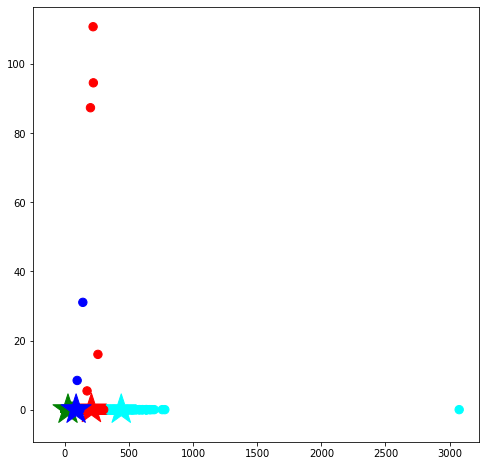

[[ 20.426016    0.       ]
 [226.8541      0.       ]
 [325.93683     0.       ]
 ...
 [  9.503956    0.       ]
 [  1.3964266   0.       ]
 [ 11.070753    0.       ]]
	~~~~centroides~~~~
[[ 111.67284    41.355057]
 [ 296.17398    11.294434]
 [  28.219505   49.895092]
 [3074.7402   3070.9993  ]]
	~~~~Etiquetas~~~~
[2 1 1 ... 2 2 2]
(4, 2) shape


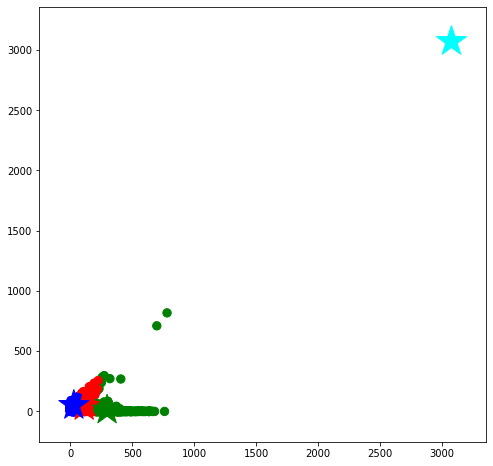

[[ 20.426016   51.928535 ]
 [226.8541     10.230653 ]
 [325.93683     0.       ]
 ...
 [  9.503956   49.22761  ]
 [  1.3964266  58.492126 ]
 [ 11.070753   53.92156  ]]
	~~~~centroides~~~~
[[ 85.98943   41.083572]
 [ 24.741444  19.60691 ]
 [439.6501    51.9872  ]
 [206.07143   38.01554 ]]
	~~~~Etiquetas~~~~
[1 3 2 ... 1 1 1]
(4, 2) shape


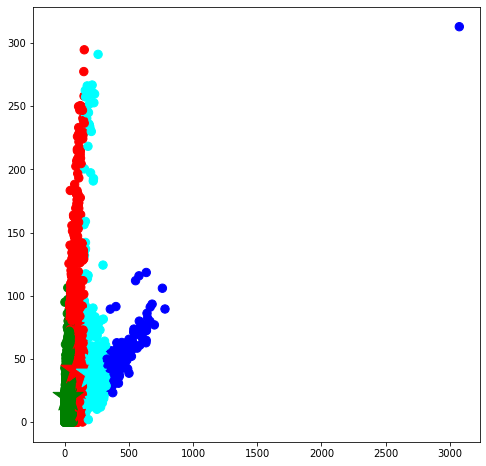

[[ 20.426016   23.882626 ]
 [226.8541     28.328028 ]
 [325.93683    40.318398 ]
 ...
 [  9.503956   27.04717  ]
 [  1.3964266  10.2813425]
 [ 11.070753   25.568916 ]]
	~~~~centroides~~~~
[[ 111.637375   20.618267]
 [  28.213213   10.533438]
 [ 296.78085    20.321884]
 [3074.7402   3066.969   ]]
	~~~~Etiquetas~~~~
[1 2 2 ... 1 1 1]
(4, 2) shape


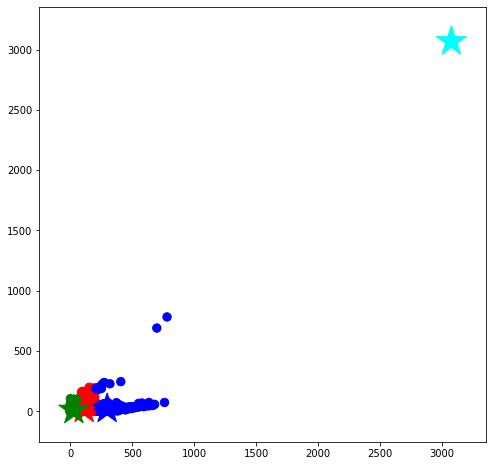

[[ 20.426016    7.1828465]
 [226.8541     10.137584 ]
 [325.93683    17.826756 ]
 ...
 [  9.503956    7.3201222]
 [  1.3964266   3.6686597]
 [ 11.070753    7.654843 ]]
	~~~~centroides~~~~
[[ 56.876186 197.08029 ]
 [316.37756   48.54896 ]
 [ 28.330091  45.7513  ]
 [119.20491   50.343636]]
	~~~~Etiquetas~~~~
[2 1 1 ... 0 2 2]
(4, 2) shape


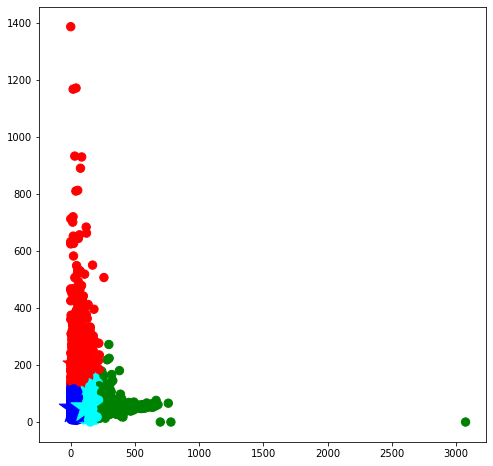

[[ 20.426016   41.810192 ]
 [226.8541     47.335686 ]
 [325.93683    50.111866 ]
 ...
 [  9.503956  164.18541  ]
 [  1.3964266  15.559553 ]
 [ 11.070753   39.051765 ]]
	~~~~centroides~~~~
[[ 36.157967  67.08907 ]
 [218.60945   73.127815]
 [ 55.428062 565.9926  ]
 [ 52.389484 178.80797 ]]
	~~~~Etiquetas~~~~
[0 1 1 ... 3 0 0]
(4, 2) shape


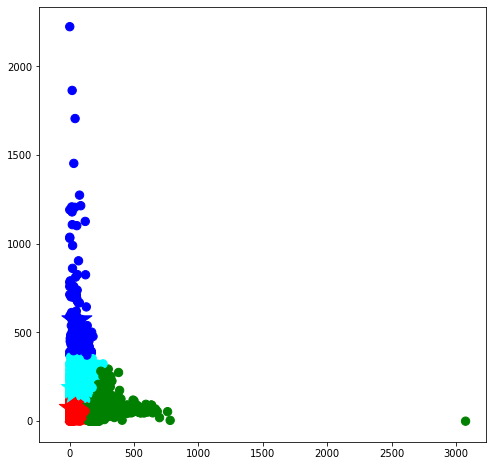

[[ 20.426016   57.13201  ]
 [226.8541     84.189445 ]
 [325.93683    76.36401  ]
 ...
 [  9.503956  238.84186  ]
 [  1.3964266  33.26827  ]
 [ 11.070753   50.125973 ]]
-----
	~~~~centroides~~~~
[[  0.        26.36546 ]
 [  0.        75.808624]
 [  0.       578.40735 ]
 [  0.       184.5151  ]]
	~~~~Etiquetas~~~~
[0 1 1 ... 3 0 0]
(4, 2) shape


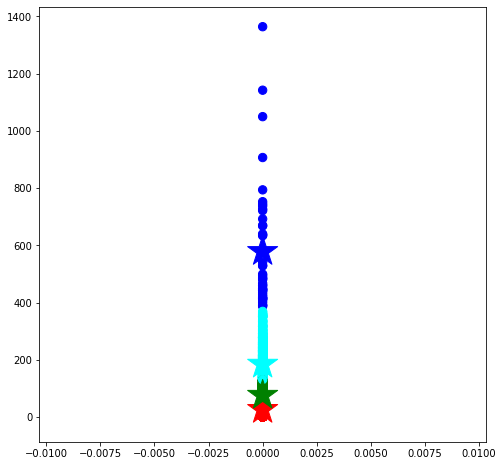

[[  0.         17.124779 ]
 [  0.         59.877357 ]
 [  0.         69.2452   ]
 ...
 [  0.        130.56897  ]
 [  0.          0.5456129]
 [  0.         13.326637 ]]
	~~~~centroides~~~~
[[  0.        60.960815]
 [  0.       128.94777 ]
 [  0.        82.69879 ]
 [  0.       217.31326 ]]
	~~~~Etiquetas~~~~
[0 1 3 ... 0 2 0]
(4, 2) shape


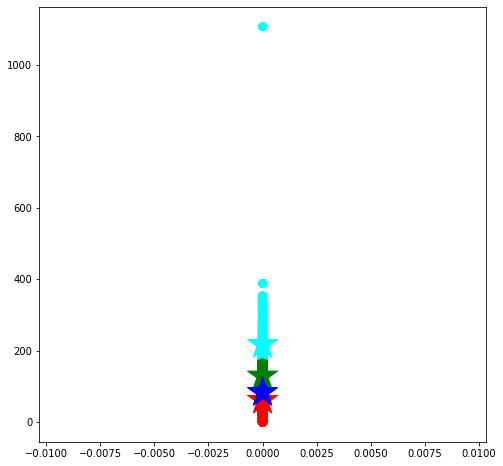

[[  0.        66.34226 ]
 [  0.       146.1139  ]
 [  0.       186.41199 ]
 ...
 [  0.        58.564617]
 [  0.        72.77723 ]
 [  0.        63.074905]]
	~~~~centroides~~~~
[[   0.         28.921078]
 [   0.        108.34914 ]
 [   0.       3761.8333  ]
 [   0.        379.5024  ]]
	~~~~Etiquetas~~~~
[0 0 0 ... 1 0 0]
(4, 2) shape


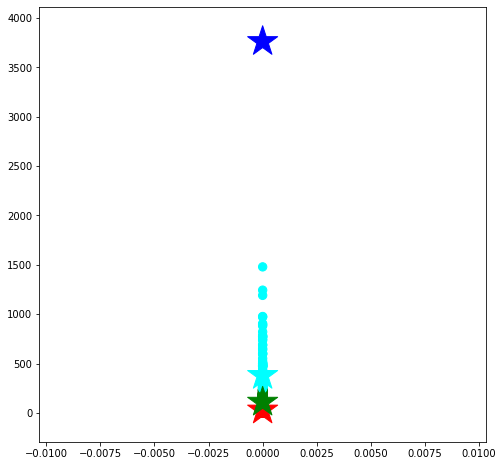

[[  0.         22.962936 ]
 [  0.         32.42937  ]
 [  0.         41.0827   ]
 ...
 [  0.        143.90247  ]
 [  0.          2.1496983]
 [  0.         15.959665 ]]
	~~~~centroides~~~~
[[0.0000000e+00 5.9004221e-04]
 [0.0000000e+00 9.0998016e+01]
 [0.0000000e+00 2.3526163e+01]
 [0.0000000e+00 1.1084159e+02]]
	~~~~Etiquetas~~~~
[0 0 0 ... 0 0 0]
(4, 2) shape


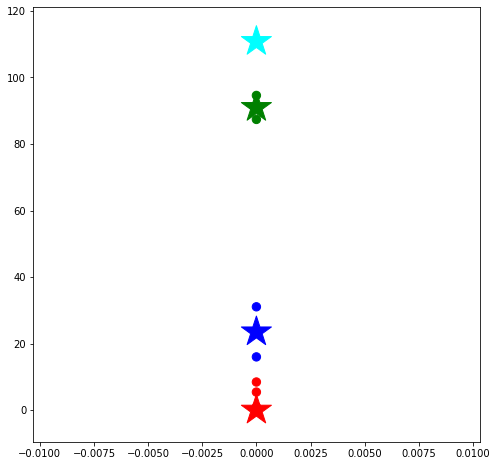

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
	~~~~centroides~~~~
[[   0.         23.059795]
 [   0.        124.189865]
 [   0.       3070.9993  ]
 [   0.         51.571877]]
	~~~~Etiquetas~~~~
[3 0 0 ... 3 3 3]
(4, 2) shape


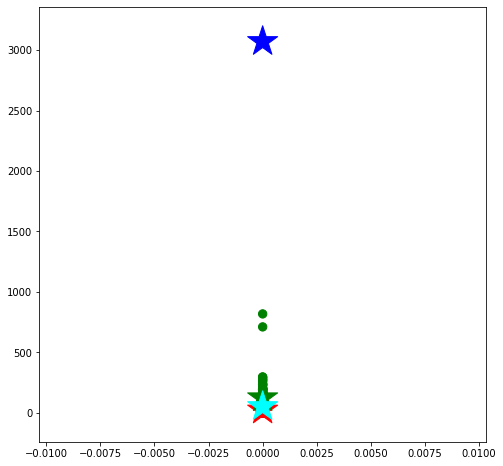

[[ 0.       51.928535]
 [ 0.       10.230653]
 [ 0.        0.      ]
 ...
 [ 0.       49.22761 ]
 [ 0.       58.492126]
 [ 0.       53.92156 ]]
	~~~~centroides~~~~
[[  0.        13.872826]
 [  0.        73.06622 ]
 [  0.        32.27281 ]
 [  0.       168.34091 ]]
	~~~~Etiquetas~~~~
[2 2 2 ... 2 0 2]
(4, 2) shape


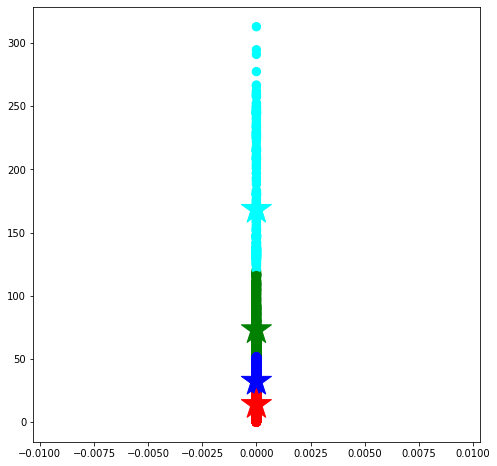

[[ 0.        23.882626 ]
 [ 0.        28.328028 ]
 [ 0.        40.318398 ]
 ...
 [ 0.        27.04717  ]
 [ 0.        10.2813425]
 [ 0.        25.568916 ]]
	~~~~centroides~~~~
[[   0.         54.492527]
 [   0.          9.440022]
 [   0.       3066.969   ]
 [   0.        159.70407 ]]
	~~~~Etiquetas~~~~
[1 1 1 ... 1 1 1]
(4, 2) shape


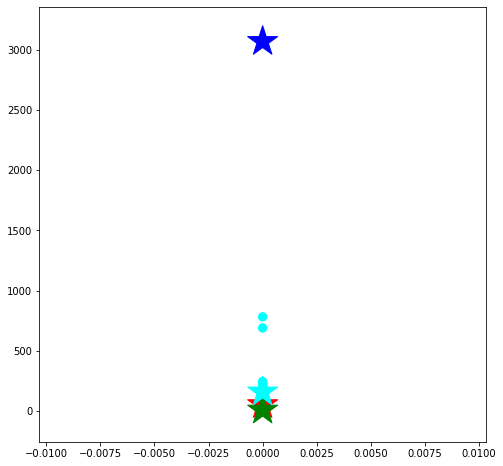

[[ 0.         7.1828465]
 [ 0.        10.137584 ]
 [ 0.        17.826756 ]
 ...
 [ 0.         7.3201222]
 [ 0.         3.6686597]
 [ 0.         7.654843 ]]
	~~~~centroides~~~~
[[  0.        36.953766]
 [  0.        89.46202 ]
 [  0.       605.9325  ]
 [  0.       211.68204 ]]
	~~~~Etiquetas~~~~
[0 0 0 ... 3 0 0]
(4, 2) shape


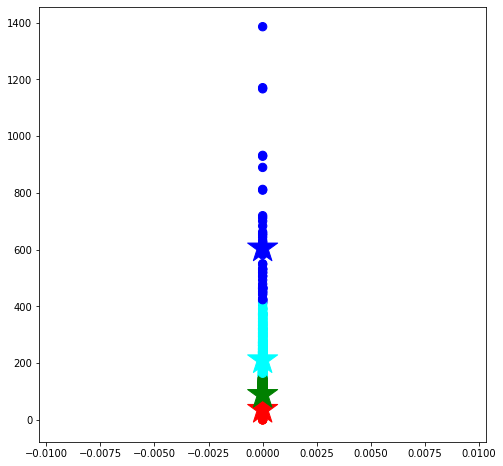

[[  0.        41.810192]
 [  0.        47.335686]
 [  0.        50.111866]
 ...
 [  0.       164.18541 ]
 [  0.        15.559553]
 [  0.        39.051765]]
	~~~~centroides~~~~
[[  0.       132.30203 ]
 [  0.        61.538948]
 [  0.       998.781   ]
 [  0.       313.69894 ]]
	~~~~Etiquetas~~~~
[1 1 1 ... 3 1 1]
(4, 2) shape


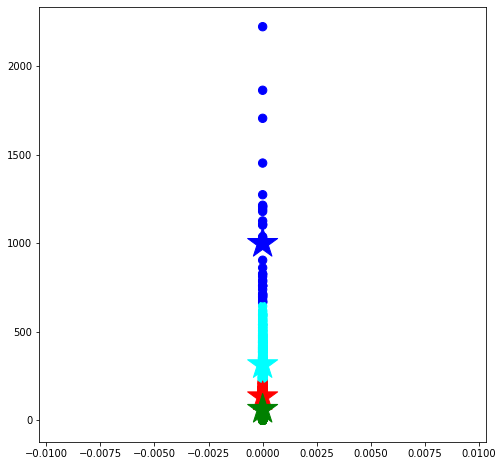

[[  0.        57.13201 ]
 [  0.        84.189445]
 [  0.        76.36401 ]
 ...
 [  0.       238.84186 ]
 [  0.        33.26827 ]
 [  0.        50.125973]]
-----
	~~~~centroides~~~~
[[ 28.70374  71.04641]
 [309.19458  38.56505]
 [105.17316  60.29563]
 [ 54.62805 149.7777 ]]
	~~~~Etiquetas~~~~
[0 3 3 ... 2 0 0]
(4, 2) shape


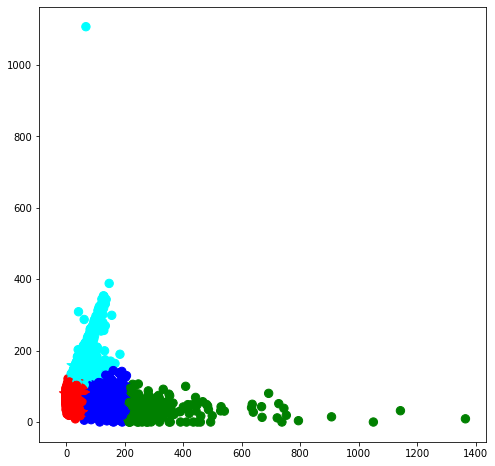

[[ 17.124779   66.34226  ]
 [ 59.877357  146.1139   ]
 [ 69.2452    186.41199  ]
 ...
 [130.56897    58.564617 ]
 [  0.5456129  72.77723  ]
 [ 13.326637   63.074905 ]]
	~~~~centroides~~~~
[[ 28.158928  26.934584]
 [ 82.7884    83.02711 ]
 [656.8039   963.8899  ]
 [207.64554  219.70505 ]]
	~~~~Etiquetas~~~~
[0 0 0 ... 1 0 0]
(4, 2) shape


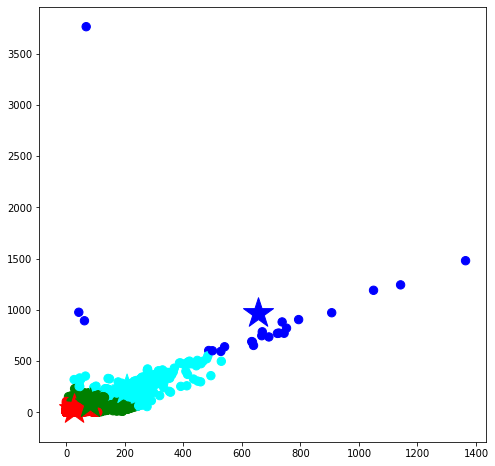

[[ 17.124779   22.962936 ]
 [ 59.877357   32.42937  ]
 [ 69.2452     41.0827   ]
 ...
 [130.56897   143.90247  ]
 [  0.5456129   2.1496983]
 [ 13.326637   15.959665 ]]
	~~~~centroides~~~~
[[ 2.6315701e+01  1.7684458e-02]
 [ 1.8401465e+02  2.1856913e-02]
 [ 5.7840735e+02 -7.4505806e-09]
 [ 7.5536880e+01 -5.1409006e-07]]
	~~~~Etiquetas~~~~
[0 3 3 ... 1 0 0]
(4, 2) shape


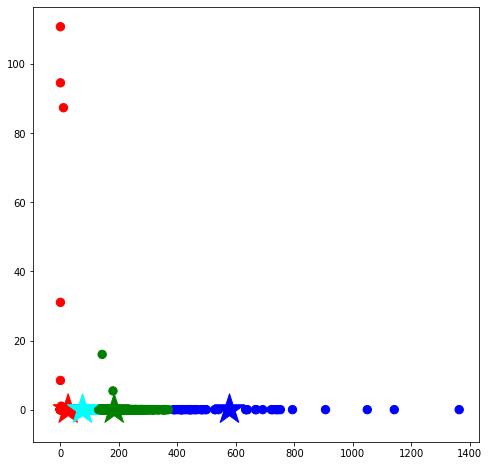

[[ 17.124779    0.       ]
 [ 59.877357    0.       ]
 [ 69.2452      0.       ]
 ...
 [130.56897     0.       ]
 [  0.5456129   0.       ]
 [ 13.326637    0.       ]]
	~~~~centroides~~~~
[[  26.933077   47.04383 ]
 [  80.963486   41.568214]
 [ 220.98912    78.894745]
 [  67.97454  3070.9993  ]]
	~~~~Etiquetas~~~~
[0 1 1 ... 1 0 0]
(4, 2) shape


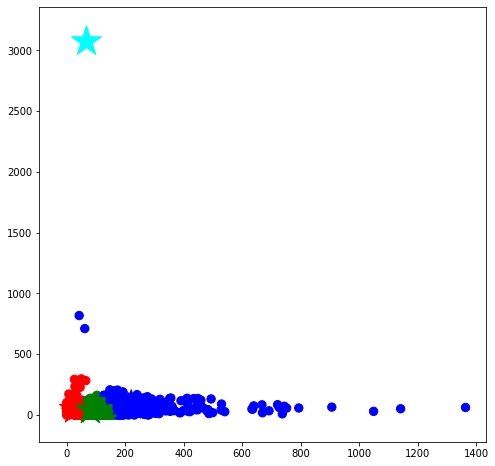

[[ 17.124779   51.928535 ]
 [ 59.877357   10.230653 ]
 [ 69.2452      0.       ]
 ...
 [130.56897    49.22761  ]
 [  0.5456129  58.492126 ]
 [ 13.326637   53.92156  ]]
	~~~~centroides~~~~
[[ 26.800068  18.3928  ]
 [578.40735  110.83923 ]
 [ 77.19951   40.065914]
 [183.7185   100.1302  ]]
	~~~~Etiquetas~~~~
[0 2 2 ... 2 0 0]
(4, 2) shape


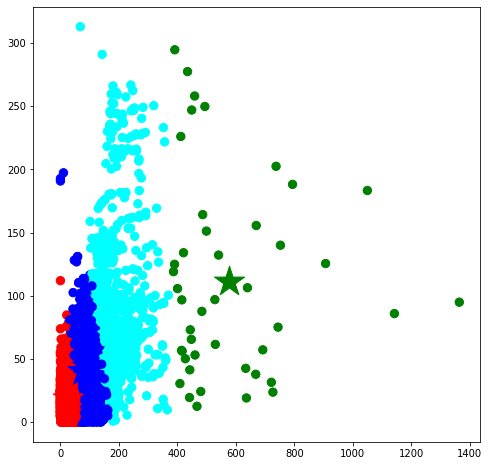

[[ 17.124779   23.882626 ]
 [ 59.877357   28.328028 ]
 [ 69.2452     40.318398 ]
 ...
 [130.56897    27.04717  ]
 [  0.5456129  10.2813425]
 [ 13.326637   25.568916 ]]
	~~~~centroides~~~~
[[  27.915577    8.79796 ]
 [  86.274765   21.408932]
 [  67.97454  3066.969   ]
 [ 228.69164    72.99475 ]]
	~~~~Etiquetas~~~~
[0 1 1 ... 1 0 0]
(4, 2) shape


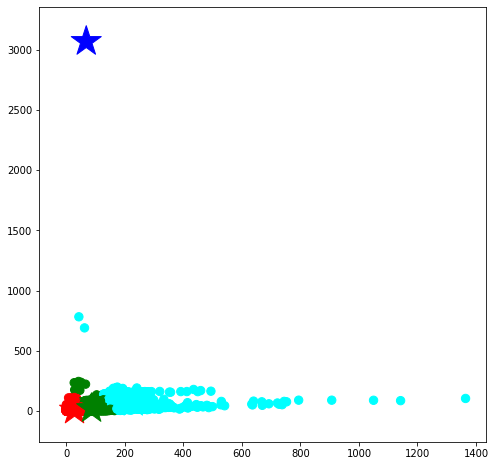

[[ 17.124779    7.1828465]
 [ 59.877357   10.137584 ]
 [ 69.2452     17.826756 ]
 ...
 [130.56897     7.3201222]
 [  0.5456129   3.6686597]
 [ 13.326637    7.654843 ]]
	~~~~centroides~~~~
[[ 27.139755  38.011936]
 [ 78.0064    88.41399 ]
 [188.42532  216.97821 ]
 [593.03467  644.60077 ]]
	~~~~Etiquetas~~~~
[0 0 1 ... 2 0 0]
(4, 2) shape


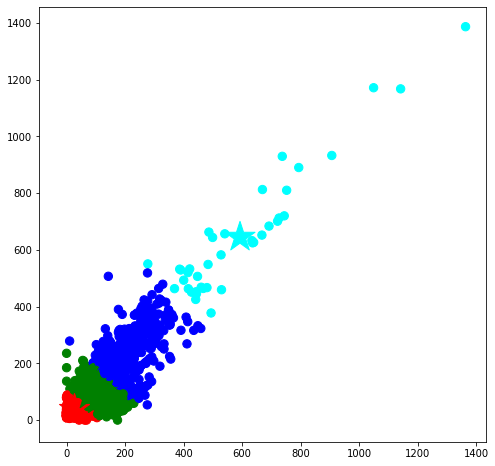

[[ 17.124779   41.810192 ]
 [ 59.877357   47.335686 ]
 [ 69.2452     50.111866 ]
 ...
 [130.56897   164.18541  ]
 [  0.5456129  15.559553 ]
 [ 13.326637   39.051765 ]]
	~~~~centroides~~~~
[[  27.947266   62.354992]
 [ 196.41864   317.30368 ]
 [ 630.6092   1028.6578  ]
 [  80.62087   131.81673 ]]
	~~~~Etiquetas~~~~
[0 0 0 ... 1 0 0]
(4, 2) shape


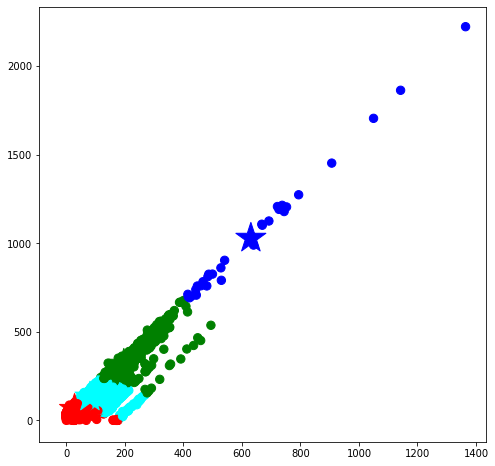

[[ 17.124779   57.13201  ]
 [ 59.877357   84.189445 ]
 [ 69.2452     76.36401  ]
 ...
 [130.56897   238.84186  ]
 [  0.5456129  33.26827  ]
 [ 13.326637   50.125973 ]]
-----
	~~~~centroides~~~~
[[  77.42904    28.764313]
 [  62.990368  107.13228 ]
 [1106.9785   3761.8333  ]
 [  49.49646   380.1766  ]]
	~~~~Etiquetas~~~~
[0 0 0 ... 1 0 0]
(4, 2) shape


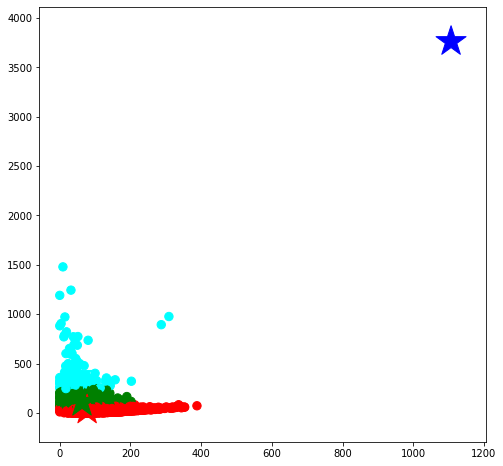

[[ 66.34226    22.962936 ]
 [146.1139     32.42937  ]
 [186.41199    41.0827   ]
 ...
 [ 58.564617  143.90247  ]
 [ 72.77723     2.1496983]
 [ 63.074905   15.959665 ]]
	~~~~centroides~~~~
[[8.20254440e+01 3.75322998e-07]
 [1.27722206e+02 4.37721610e-08]
 [6.07031784e+01 2.42510475e-02]
 [2.15551849e+02 3.53902578e-08]]
	~~~~Etiquetas~~~~
[2 1 3 ... 2 0 2]
(4, 2) shape


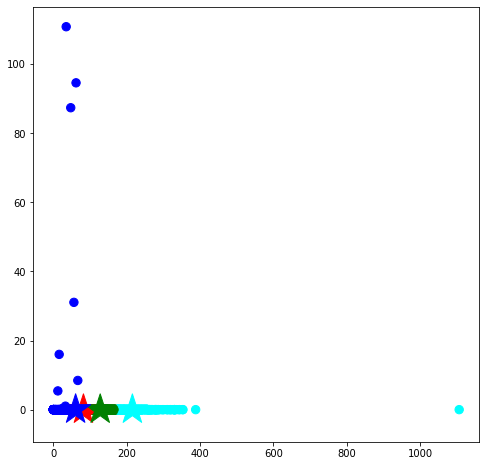

[[ 66.34226    0.      ]
 [146.1139     0.      ]
 [186.41199    0.      ]
 ...
 [ 58.564617   0.      ]
 [ 72.77723    0.      ]
 [ 63.074905   0.      ]]
	~~~~centroides~~~~
[[  64.38135    52.23191 ]
 [  95.6539     34.380077]
 [1106.9785   3070.9993  ]
 [ 173.26846     9.32476 ]]
	~~~~Etiquetas~~~~
[0 3 3 ... 0 0 0]
(4, 2) shape


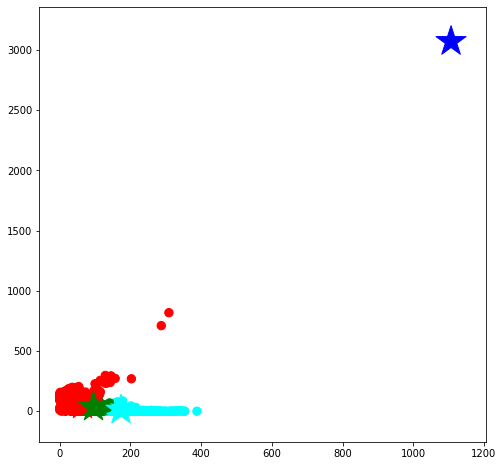

[[ 66.34226   51.928535]
 [146.1139    10.230653]
 [186.41199    0.      ]
 ...
 [ 58.564617  49.22761 ]
 [ 72.77723   58.492126]
 [ 63.074905  53.92156 ]]
	~~~~centroides~~~~
[[ 72.43384   17.275257]
 [149.95905   31.585133]
 [ 32.465424 143.4418  ]
 [ 58.178764  48.659966]]
	~~~~Etiquetas~~~~
[0 1 1 ... 0 0 0]
(4, 2) shape


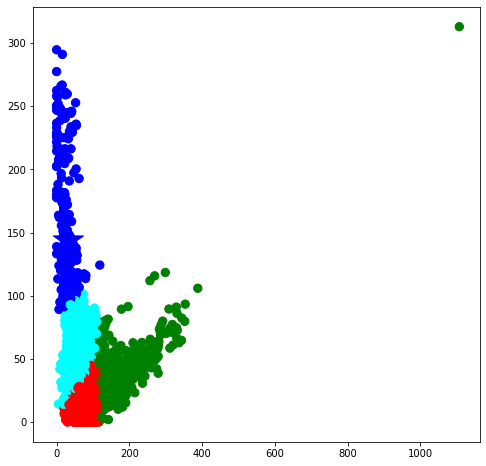

[[ 66.34226    23.882626 ]
 [146.1139     28.328028 ]
 [186.41199    40.318398 ]
 ...
 [ 58.564617   27.04717  ]
 [ 72.77723    10.2813425]
 [ 63.074905   25.568916 ]]
	~~~~centroides~~~~
[[  42.520706   95.85682 ]
 [ 144.39545    12.243337]
 [1106.9785   3066.969   ]
 [  69.5205     10.134262]]
	~~~~Etiquetas~~~~
[3 1 1 ... 3 3 3]
(4, 2) shape


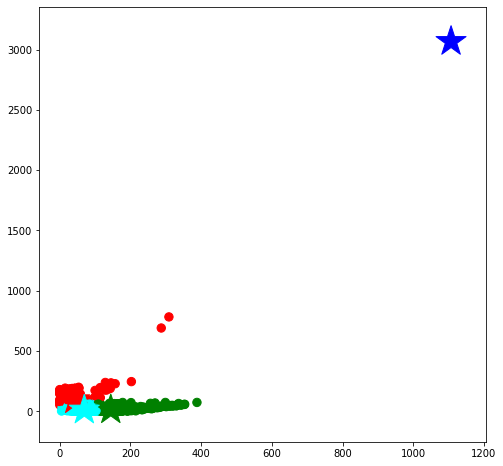

[[ 66.34226     7.1828465]
 [146.1139     10.137584 ]
 [186.41199    17.826756 ]
 ...
 [ 58.564617    7.3201222]
 [ 72.77723     3.6686597]
 [ 63.074905    7.654843 ]]
	~~~~centroides~~~~
[[149.18353   41.12837 ]
 [ 62.777    121.72297 ]
 [ 70.46873   41.11682 ]
 [ 44.101917 370.14633 ]]
	~~~~Etiquetas~~~~
[2 0 0 ... 1 2 2]
(4, 2) shape


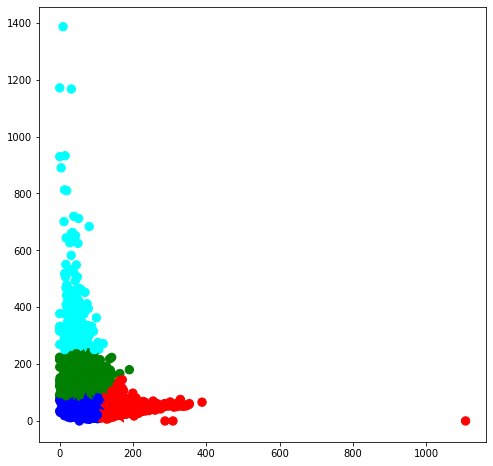

[[ 66.34226   41.810192]
 [146.1139    47.335686]
 [186.41199   50.111866]
 ...
 [ 58.564617 164.18541 ]
 [ 72.77723   15.559553]
 [ 63.074905  39.051765]]
	~~~~centroides~~~~
[[ 77.65005   61.419304]
 [ 57.577282 313.93756 ]
 [ 33.818867 998.781   ]
 [ 68.27196  131.66568 ]]
	~~~~Etiquetas~~~~
[0 0 0 ... 1 0 0]
(4, 2) shape


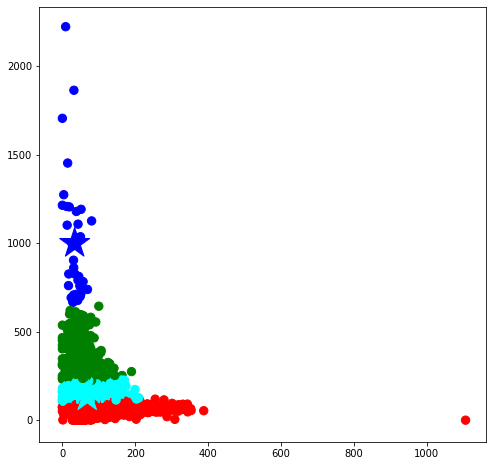

[[ 66.34226   57.13201 ]
 [146.1139    84.189445]
 [186.41199   76.36401 ]
 ...
 [ 58.564617 238.84186 ]
 [ 72.77723   33.26827 ]
 [ 63.074905  50.125973]]
-----
	~~~~centroides~~~~
[[2.8921078e+01 7.1138749e-03]
 [1.0834914e+02 5.1348902e-02]
 [3.7950241e+02 7.9584502e-02]
 [3.7618333e+03 0.0000000e+00]]
	~~~~Etiquetas~~~~
[0 0 0 ... 1 0 0]
(4, 2) shape


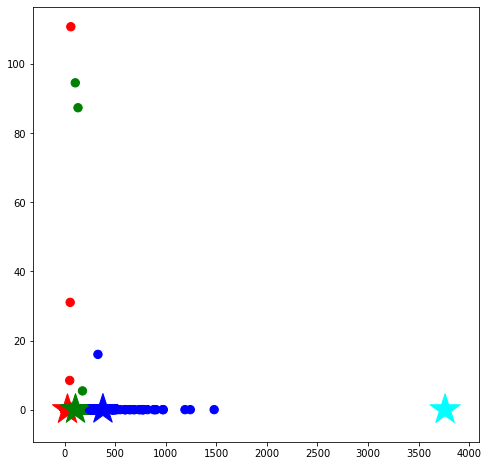

[[ 22.962936    0.       ]
 [ 32.42937     0.       ]
 [ 41.0827      0.       ]
 ...
 [143.90247     0.       ]
 [  2.1496983   0.       ]
 [ 15.959665    0.       ]]
	~~~~centroides~~~~
[[ 108.93686    48.508957]
 [  29.023129   46.4865  ]
 [3761.8333   3070.9993  ]
 [ 379.49463    62.989113]]
	~~~~Etiquetas~~~~
[1 1 1 ... 0 1 1]
(4, 2) shape


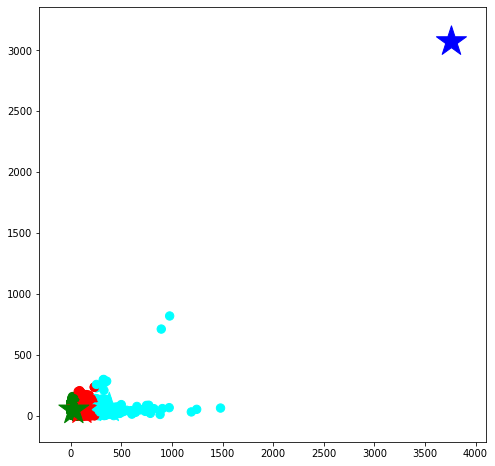

[[ 22.962936   51.928535 ]
 [ 32.42937    10.230653 ]
 [ 41.0827      0.       ]
 ...
 [143.90247    49.22761  ]
 [  2.1496983  58.492126 ]
 [ 15.959665   53.92156  ]]
	~~~~centroides~~~~
[[  29.302052   20.860226]
 [ 379.37183    89.160324]
 [ 108.12182    52.91481 ]
 [3761.8333    312.9107  ]]
	~~~~Etiquetas~~~~
[0 0 0 ... 2 0 0]
(4, 2) shape


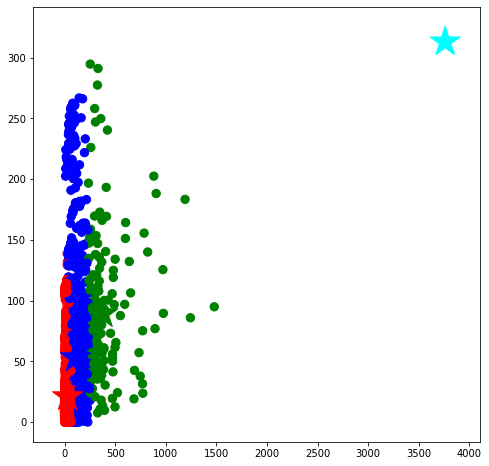

[[ 22.962936   23.882626 ]
 [ 32.42937    28.328028 ]
 [ 41.0827     40.318398 ]
 ...
 [143.90247    27.04717  ]
 [  2.1496983  10.2813425]
 [ 15.959665   25.568916 ]]
	~~~~centroides~~~~
[[  29.15651    10.115015]
 [ 377.3543     55.505722]
 [3761.8333   3066.969   ]
 [ 109.26674    26.414146]]
	~~~~Etiquetas~~~~
[0 0 0 ... 3 0 0]
(4, 2) shape


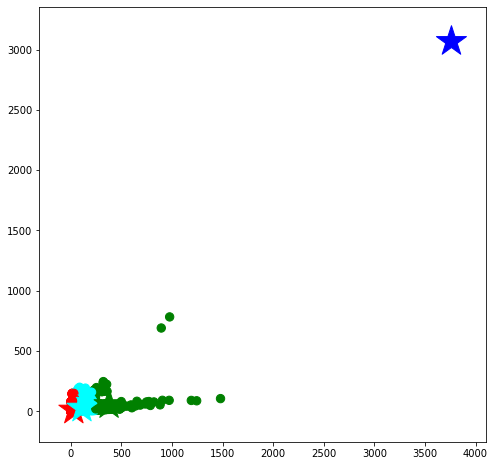

[[ 22.962936    7.1828465]
 [ 32.42937    10.137584 ]
 [ 41.0827     17.826756 ]
 ...
 [143.90247     7.3201222]
 [  2.1496983   3.6686597]
 [ 15.959665    7.654843 ]]
	~~~~centroides~~~~
[[ 86.08801   97.499084]
 [ 26.88037   38.76822 ]
 [946.68286  689.25183 ]
 [226.44928  245.06653 ]]
	~~~~Etiquetas~~~~
[1 1 1 ... 0 1 1]
(4, 2) shape


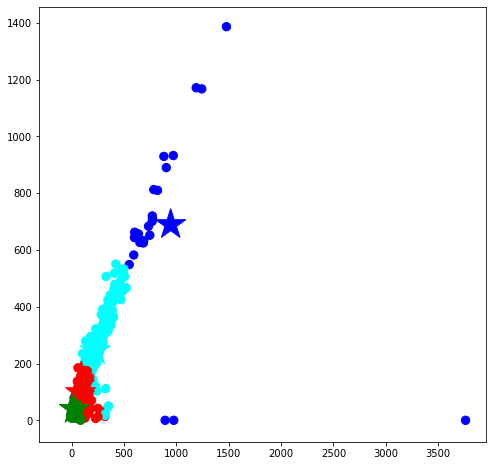

[[ 22.962936   41.810192 ]
 [ 32.42937    47.335686 ]
 [ 41.0827     50.111866 ]
 ...
 [143.90247   164.18541  ]
 [  2.1496983  15.559553 ]
 [ 15.959665   39.051765 ]]
	~~~~centroides~~~~
[[  28.176443   64.121216]
 [ 238.61707   351.9886  ]
 [  89.87297   145.30429 ]
 [ 947.77655  1142.4075  ]]
	~~~~Etiquetas~~~~
[0 0 0 ... 2 0 0]
(4, 2) shape


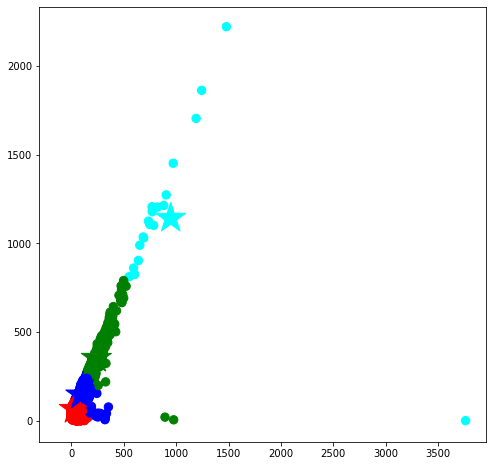

[[ 22.962936   57.13201  ]
 [ 32.42937    84.189445 ]
 [ 41.0827     76.36401  ]
 ...
 [143.90247   238.84186  ]
 [  2.1496983  33.26827  ]
 [ 15.959665   50.125973 ]]
-----
	~~~~centroides~~~~
[[3.91155481e-08 1.24189865e+02]
 [6.34262040e-02 2.30830593e+01]
 [0.00000000e+00 3.07099927e+03]
 [2.85094604e-04 5.15786133e+01]]
	~~~~Etiquetas~~~~
[3 1 1 ... 3 3 3]
(4, 2) shape


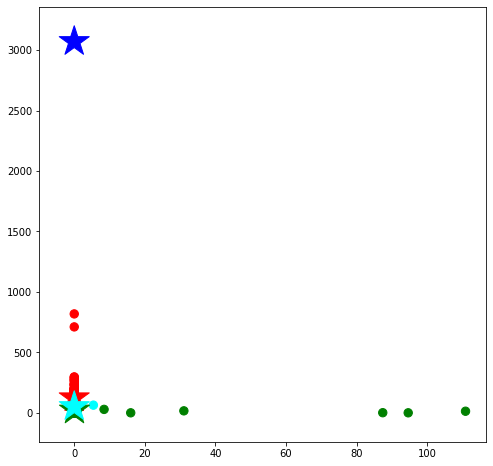

[[ 0.       51.928535]
 [ 0.       10.230653]
 [ 0.        0.      ]
 ...
 [ 0.       49.22761 ]
 [ 0.       58.492126]
 [ 0.       53.92156 ]]
	~~~~centroides~~~~
[[4.8056245e-07 3.2262154e+01]
 [1.0533258e-06 1.3867709e+01]
 [1.0236405e+00 1.6834091e+02]
 [2.5400883e-02 7.3053459e+01]]
	~~~~Etiquetas~~~~
[0 0 0 ... 0 1 0]
(4, 2) shape


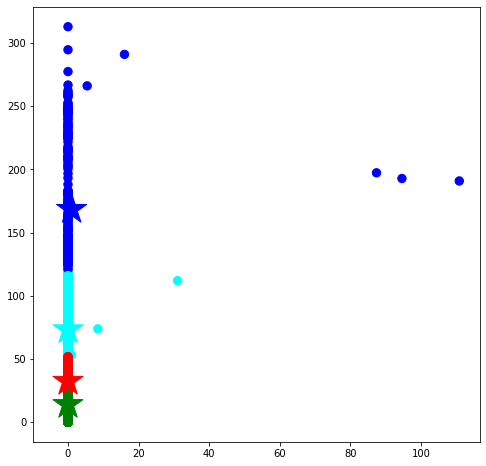

[[ 0.        23.882626 ]
 [ 0.        28.328028 ]
 [ 0.        40.318398 ]
 ...
 [ 0.        27.04717  ]
 [ 0.        10.2813425]
 [ 0.        25.568916 ]]
	~~~~centroides~~~~
[[1.0061914e-02 9.4419279e+00]
 [0.0000000e+00 3.0669690e+03]
 [2.4214387e-08 1.5970407e+02]
 [9.3535915e-02 5.4528667e+01]]
	~~~~Etiquetas~~~~
[0 0 0 ... 0 0 0]
(4, 2) shape


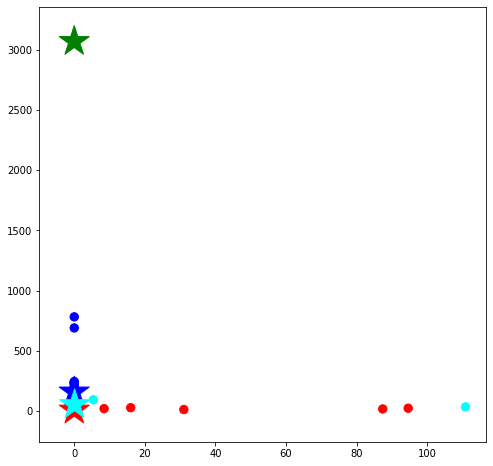

[[ 0.         7.1828465]
 [ 0.        10.137584 ]
 [ 0.        17.826756 ]
 ...
 [ 0.         7.3201222]
 [ 0.         3.6686597]
 [ 0.         7.654843 ]]
	~~~~centroides~~~~
[[6.3795596e-07 3.6953766e+01]
 [7.6308153e-03 8.9462021e+01]
 [3.2645878e-01 6.0593250e+02]
 [3.4802935e-01 2.1168204e+02]]
	~~~~Etiquetas~~~~
[0 0 0 ... 3 0 0]
(4, 2) shape


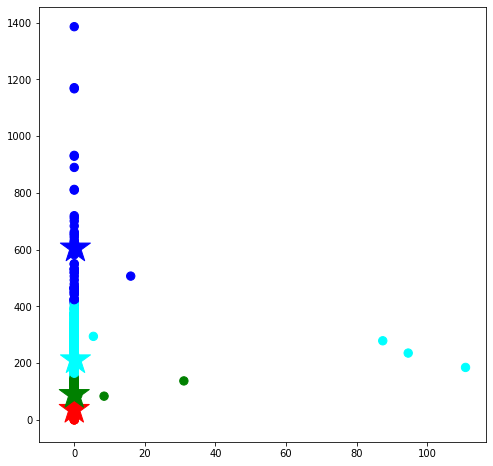

[[  0.        41.810192]
 [  0.        47.335686]
 [  0.        50.111866]
 ...
 [  0.       164.18541 ]
 [  0.        15.559553]
 [  0.        39.051765]]
	~~~~centroides~~~~
[[ 1.0585692e-03  1.3227434e+02]
 [ 2.2950511e-02  3.1369894e+02]
 [-6.5192580e-09  9.9878101e+02]
 [ 1.7289946e-02  6.1531616e+01]]
	~~~~Etiquetas~~~~
[3 3 3 ... 1 3 3]
(4, 2) shape


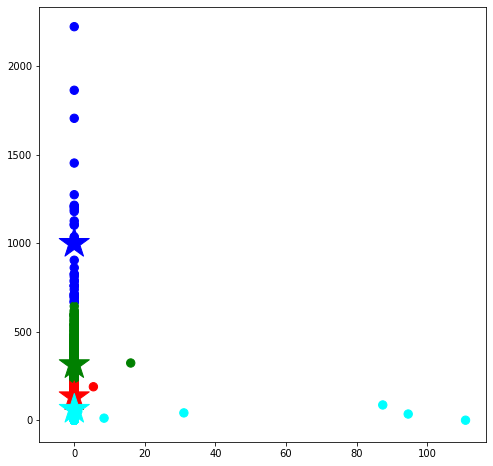

[[  0.        57.13201 ]
 [  0.        84.189445]
 [  0.        76.36401 ]
 ...
 [  0.       238.84186 ]
 [  0.        33.26827 ]
 [  0.        50.125973]]
-----
	~~~~centroides~~~~
[[ 108.41504   128.5003  ]
 [  50.870117   17.576218]
 [3070.9993    312.9107  ]
 [  30.881727   38.166122]]
	~~~~Etiquetas~~~~
[1 3 3 ... 1 1 1]
(4, 2) shape


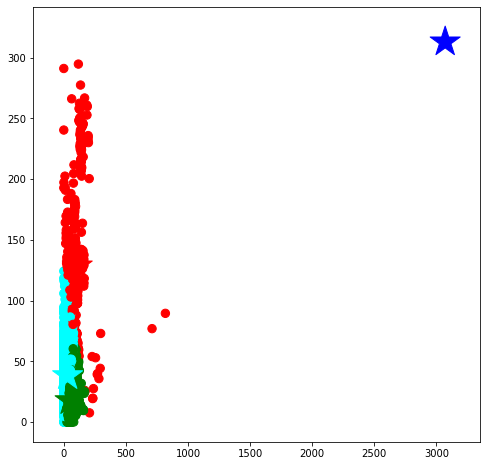

[[51.928535  23.882626 ]
 [10.230653  28.328028 ]
 [ 0.        40.318398 ]
 ...
 [49.22761   27.04717  ]
 [58.492126  10.2813425]
 [53.92156   25.568916 ]]
	~~~~centroides~~~~
[[  22.953295   12.586811]
 [3070.9993   3066.969   ]
 [  51.50912    10.028574]
 [ 122.17471   107.11161 ]]
	~~~~Etiquetas~~~~
[2 0 0 ... 2 2 2]
(4, 2) shape


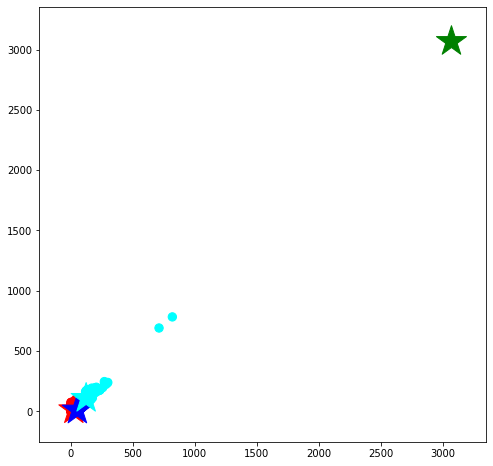

[[51.928535   7.1828465]
 [10.230653  10.137584 ]
 [ 0.        17.826756 ]
 ...
 [49.22761    7.3201222]
 [58.492126   3.6686597]
 [53.92156    7.654843 ]]
	~~~~centroides~~~~
[[  47.25313    40.72418 ]
 [  45.059673  119.69429 ]
 [  44.02243   365.9199  ]
 [3070.9993      0.      ]]
	~~~~Etiquetas~~~~
[0 0 0 ... 1 0 0]
(4, 2) shape


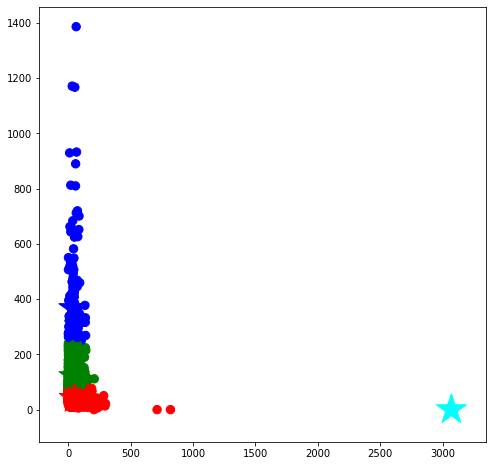

[[ 51.928535  41.810192]
 [ 10.230653  47.335686]
 [  0.        50.111866]
 ...
 [ 49.22761  164.18541 ]
 [ 58.492126  15.559553]
 [ 53.92156   39.051765]]
	~~~~centroides~~~~
[[ 47.284424  61.721245]
 [ 46.231747 133.06618 ]
 [ 46.281876 998.781   ]
 [ 45.67055  314.22073 ]]
	~~~~Etiquetas~~~~
[0 0 0 ... 3 0 0]
(4, 2) shape


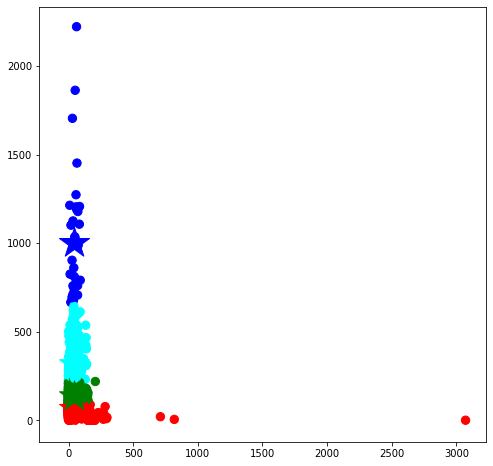

[[ 51.928535  57.13201 ]
 [ 10.230653  84.189445]
 [  0.        76.36401 ]
 ...
 [ 49.22761  238.84186 ]
 [ 58.492126  33.26827 ]
 [ 53.92156   50.125973]]
-----
	~~~~centroides~~~~
[[  18.667227    8.690749]
 [  54.461487   24.798676]
 [ 312.9107   3066.969   ]
 [ 146.86214   111.95166 ]]
	~~~~Etiquetas~~~~
[0 0 1 ... 0 0 0]
(4, 2) shape


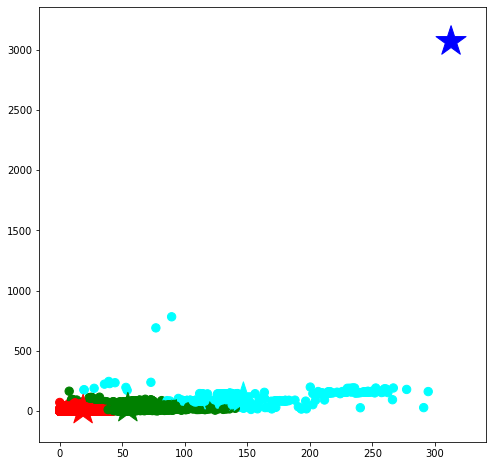

[[23.882626   7.1828465]
 [28.328028  10.137584 ]
 [40.318398  17.826756 ]
 ...
 [27.04717    7.3201222]
 [10.2813425  3.6686597]
 [25.568916   7.654843 ]]
	~~~~centroides~~~~
[[ 17.444351  35.75244 ]
 [ 66.86059  178.72614 ]
 [ 40.713837  78.878174]
 [107.182144 454.21457 ]]
	~~~~Etiquetas~~~~
[0 0 0 ... 1 0 0]
(4, 2) shape


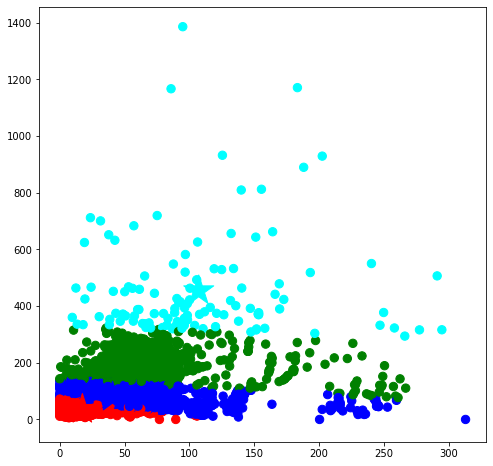

[[ 23.882626   41.810192 ]
 [ 28.328028   47.335686 ]
 [ 40.318398   50.111866 ]
 ...
 [ 27.04717   164.18541  ]
 [ 10.2813425  15.559553 ]
 [ 25.568916   39.051765 ]]
	~~~~centroides~~~~
[[ 20.942627  61.570923]
 [ 65.40623  311.1463  ]
 [ 38.775856 131.24808 ]
 [ 89.91531  998.781   ]]
	~~~~Etiquetas~~~~
[0 0 0 ... 1 0 0]
(4, 2) shape


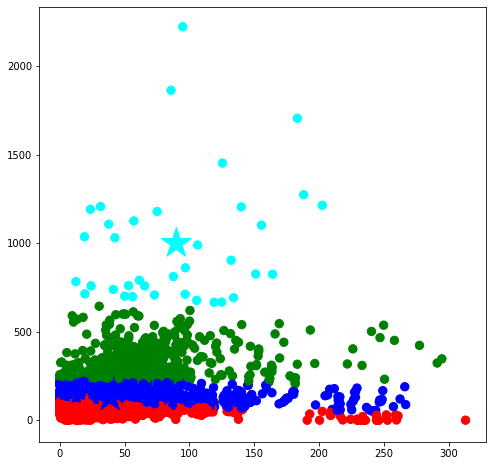

[[ 23.882626   57.13201  ]
 [ 28.328028   84.189445 ]
 [ 40.318398   76.36401  ]
 ...
 [ 27.04717   238.84186  ]
 [ 10.2813425  33.26827  ]
 [ 25.568916   50.125973 ]]
-----
	~~~~centroides~~~~
[[  11.45999    40.72834 ]
 [  36.129845  365.9199  ]
 [  19.023165  119.62599 ]
 [3066.969       0.      ]]
	~~~~Etiquetas~~~~
[0 0 0 ... 2 0 0]
(4, 2) shape


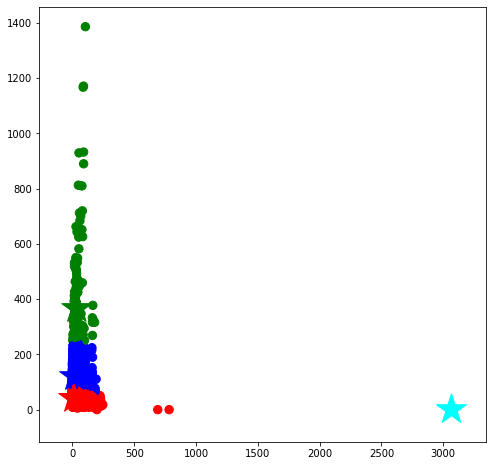

[[  7.1828465  41.810192 ]
 [ 10.137584   47.335686 ]
 [ 17.826756   50.111866 ]
 ...
 [  7.3201222 164.18541  ]
 [  3.6686597  15.559553 ]
 [  7.654843   39.051765 ]]
	~~~~centroides~~~~
[[ 16.719372 132.2843  ]
 [ 54.852802 998.781   ]
 [ 11.308014  61.561348]
 [ 26.768341 313.5581  ]]
	~~~~Etiquetas~~~~
[2 2 2 ... 3 2 2]
(4, 2) shape


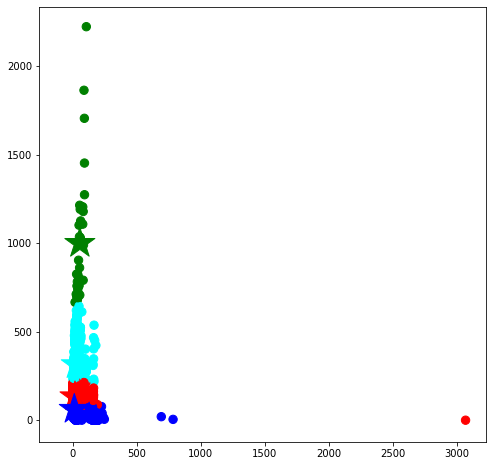

[[  7.1828465  57.13201  ]
 [ 10.137584   84.189445 ]
 [ 17.826756   76.36401  ]
 ...
 [  7.3201222 238.84186  ]
 [  3.6686597  33.26827  ]
 [  7.654843   50.125973 ]]
-----
	~~~~centroides~~~~
[[ 37.797874  61.667274]
 [ 92.2781   131.31558 ]
 [659.6813   998.781   ]
 [224.4974   309.7449  ]]
	~~~~Etiquetas~~~~
[0 0 0 ... 3 0 0]
(4, 2) shape


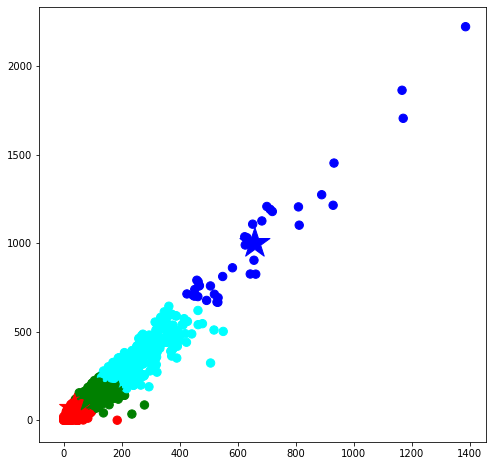

[[ 41.810192  57.13201 ]
 [ 47.335686  84.189445]
 [ 50.111866  76.36401 ]
 ...
 [164.18541  238.84186 ]
 [ 15.559553  33.26827 ]
 [ 39.051765  50.125973]]
-----


In [91]:
def matrix(data):
    print ("hi")
    data = np.array(data)
    

    size = len(data[0])
    print(size)
    colores=['red','green','blue','cyan']
    for i in range (size-1):
#         print(data[:,i:i+1])
        for j in range(i+1,size):
            X = np.concatenate((data[:,i:i+1],data[:,j:j+1]),axis=1)
            kmeans(X,4,colores,2)
            print(X)
        print("-----")

m = [[1,4,20,30],[2,5,21,31],[3,6,22,32],[3,6,22,32]]
matrix(data_re)

# m = np.array(m)

# m[:,1:2]


In [78]:
# data_re[:,:3].shape
X = data_re

# testClusters(20,X)

In [79]:
# pd.DataFrame(X).describe()

In [80]:
#Processando 3
# dataframe = pd.read_csv(r"caracteristicas.csv")
# dataframe.describe()
# X = np.array(dataframe[["price","accommodates","cleaning_fee"]])

# kmeans(X,4,colores,3)

In [81]:
x1 = X[:,:2]

colores=['red','blue','cyan']
# kmeans(x1,3,colores,2)

In [85]:
x2 = X[:,1:3]

colores=['red','blue','cyan']
# kmeans(x2,3,colores,2)
# print(pd.DataFrame(X).describe())
# pd.DataFrame(x2).describe()

In [83]:
x1 = X[:,0:2]

colores=['red','blue','cyan','yellow','purple']
# kmeans(x1,5,colores,2)